# Primary Data Analysis - FAIR UNIVERSE: HIGGSML UNCERTAINTY CHALLENGE

For Primary Analysis of the datasets

### Imports

In [1]:
from sys import path
import numpy as np
import pandas as pd
import json
import warnings
import os
import sys
warnings.filterwarnings("ignore")

### Directories

In [2]:

root_dir = os.getcwd()
print("Root directory is", root_dir)

input_dir_old = "/global/cfs/cdirs/m4287/hep/DATA_PHASE_1/Full_data_files_20240826/challenge_data/input_data"
input_dir_new = "/global/cfs/cdirs/m4287/hep/DATA_PHASE_2/Full_data_files_20250305/challenge_data/input_data"

ingestion_dir = "/global/cfs/cdirs/m4287/hep/HEP-Challenge/ingestion_program/"

path.append(ingestion_dir)


Root directory is /global/cfs/cdirs/m4287/hep/genHEPdata


***
# Internal imports
***

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
def histogram_compare(data_set_new, data_set_old, columns=None,nbin = 25):

    for key in data_set_new.keys():
        print("=============================================================")
        print(f"                           {key}                             ")
        print("=============================================================")
        if key not in data_set_old.keys():
            print("The data set is not the same")
            raise ValueError("The data set is not the same")


        df_new = data_set_new[key]
        df_old = data_set_old[key]
        
        weights_new = df_new["weights"]
        weights_old = df_old["weights"]
        
        if columns is None:
            columns = df_new.columns
        sns.set_theme(style="whitegrid")
        
        # Number of rows and columns in the subplot grid
        n_cols = 3  # Number of columns in the subplot grid
        n_rows = int(np.ceil(len(columns) / n_cols))  # Calculate the number of rows needed

        # Create a figure and a grid of subplots
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(8 * n_cols, 6 * n_rows))
        axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy indexing

        for i, column in enumerate(columns):

            lower_percentile = 0
            upper_percentile = 97.5
            
            lower_bound = np.percentile(df_new[column], lower_percentile)
            upper_bound = np.percentile(df_new[column], upper_percentile)
            
            df_clipped_new = df_new[(df_new[column] >= lower_bound) & (df_new[column] <= upper_bound)]
            weights_clipped_new= weights_new[(df_new[column] >= lower_bound) & (df_new[column] <= upper_bound)]
            
            df_clipped_old = df_old[(df_old[column] >= lower_bound) & (df_old[column] <= upper_bound)] 
            weights_clipped_old = weights_old[(df_old[column] >= lower_bound) & (df_old[column] <= upper_bound)]
            
            min_value = min(df_clipped_new[column].min(), df_clipped_old[column].min())
            max_value = max(df_clipped_new[column].max(), df_clipped_old[column].max())

            # Define the bin edges
            bin_edges = np.linspace(min_value, max_value, nbin + 1)
            
            new_field = df_clipped_new[column]
            old_field = df_clipped_old[column]

            y, bin_edges = np.histogram(new_field, bins=bin_edges, weights=weights_clipped_new, density=False) 

            h_err, _ = np.histogram(new_field, bin_edges, weights=weights_clipped_new**2, density=False)
            bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
            
            axes[i].errorbar(
                bin_centers,
                y,
                yerr = h_err**0.5,
                marker = '.',
                color="b",
                label="NEW",
                drawstyle = 'steps-mid'
            )
            
            # Plot the histogram for label == 1 (Signal)
            # axes[i].hist(norminal_field, bins=bin_edges, alpha=0.4, color='blue', label='NEW', weights=weights_clipped_new, density=False)


            y, bin_edges = np.histogram(old_field, bins=bin_edges, weights=weights_clipped_old, density=False)
            h_err, _ = np.histogram(old_field, bin_edges, weights=weights_clipped_old**2, density=False)
            bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
            
            axes[i].errorbar(
                bin_centers,
                y,
                yerr = h_err**0.5,
                marker = '.',
                color="r",
                label="OLD",
                drawstyle = 'steps-mid'
            )
            
            # axes[i].hist(new_field, bins=bin_edges, alpha=0.4, color='red', label='OLD', weights=weights_clipped_old, density=False)    


            
            # Set titles and labels
            axes[i].set_title(f'{column}', fontsize=16)
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Density')
            
            # Add a legend to each subplot
            axes[i].legend()

        # Hide any unused subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()

def histogram_diff(data_set_new, data_set_old, columns=None,nbin = 25):

    for key in data_set_new.keys():
        print("=============================================================")
        print(f"                           {key}                             ")
        print("=============================================================")
        if key not in data_set_old.keys():
            print("The data set is not the same")
            raise ValueError("The data set is not the same")


        df_new = data_set_new[key]
        df_old = data_set_old[key]
        
        weights_new = df_new["weights"]
        weights_old = df_old["weights"]
        
        if columns is None:
            columns = df_new.columns
            
        sns.set_theme(style="whitegrid")
        
        # Number of rows and columns in the subplot grid
        n_cols = 3  # Number of columns in the subplot grid
        n_rows = int(np.ceil(len(columns) / n_cols))  # Calculate the number of rows needed

        # Create a figure and a grid of subplots
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(8 * n_cols, 6 * n_rows))
        axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy indexing

        for i, column in enumerate(columns):

            lower_percentile = 0
            upper_percentile = 97.5
            
            lower_bound = np.percentile(df_new[column], lower_percentile)
            upper_bound = np.percentile(df_new[column], upper_percentile)
            
            df_clipped_new = df_new[(df_new[column] >= lower_bound) & (df_new[column] <= upper_bound)]
            weights_clipped_new= weights_new[(df_new[column] >= lower_bound) & (df_new[column] <= upper_bound)]
            
            df_clipped_old = df_old[(df_old[column] >= lower_bound) & (df_old[column] <= upper_bound)] 
            weights_clipped_old = weights_old[(df_old[column] >= lower_bound) & (df_old[column] <= upper_bound)]
            
            min_value = min(df_clipped_new[column].min(), df_clipped_old[column].min())
            max_value = max(df_clipped_new[column].max(), df_clipped_old[column].max())

            # Define the bin edges
            bin_edges = np.linspace(min_value, max_value, nbin + 1)
            
            new_field = df_clipped_new[column]
            old_field = df_clipped_old[column]

            hist_new, _ = np.histogram(new_field, bins=bin_edges, weights=weights_clipped_new, density=False)
            h_err_new, _ = np.histogram(new_field, bin_edges, weights=weights_clipped_new**2, density=False)
            hist_old, _ = np.histogram(old_field, bins=bin_edges, weights=weights_clipped_old, density=False)
            h_err_old, _ = np.histogram(old_field, bin_edges, weights=weights_clipped_old**2, density=False)
            
            hist_diff = hist_new - hist_old
            err_diff = np.sqrt(h_err_new + h_err_old)

            bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
            
            axes[i].errorbar(
                bin_centers,
                hist_diff,
                yerr = err_diff,
                marker = '.',
                color="b",
                label="New - Old",
                drawstyle = 'steps-mid'
            )
                        
            # Set titles and labels
            axes[i].set_title(f'{column}', fontsize=16)
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Density')
            
            # Add a legend to each subplot
            axes[i].legend()

        # Hide any unused subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()


In [4]:
from visualization import *
from datasets import Data

***
## Data
***

In [5]:

data_new = Data(input_dir_new)
data_old = Data(input_dir_old)

In [6]:
# load test sets
data_new.load_test_set()
data_old.load_test_set()

2025-03-12 10:09:31,337 - datasets             - INFO     - Test data loaded successfully
2025-03-12 10:09:37,701 - datasets             - INFO     - Test data loaded successfully


***
# Visualize
***
- Visualize TEST set

                           ztautau                             


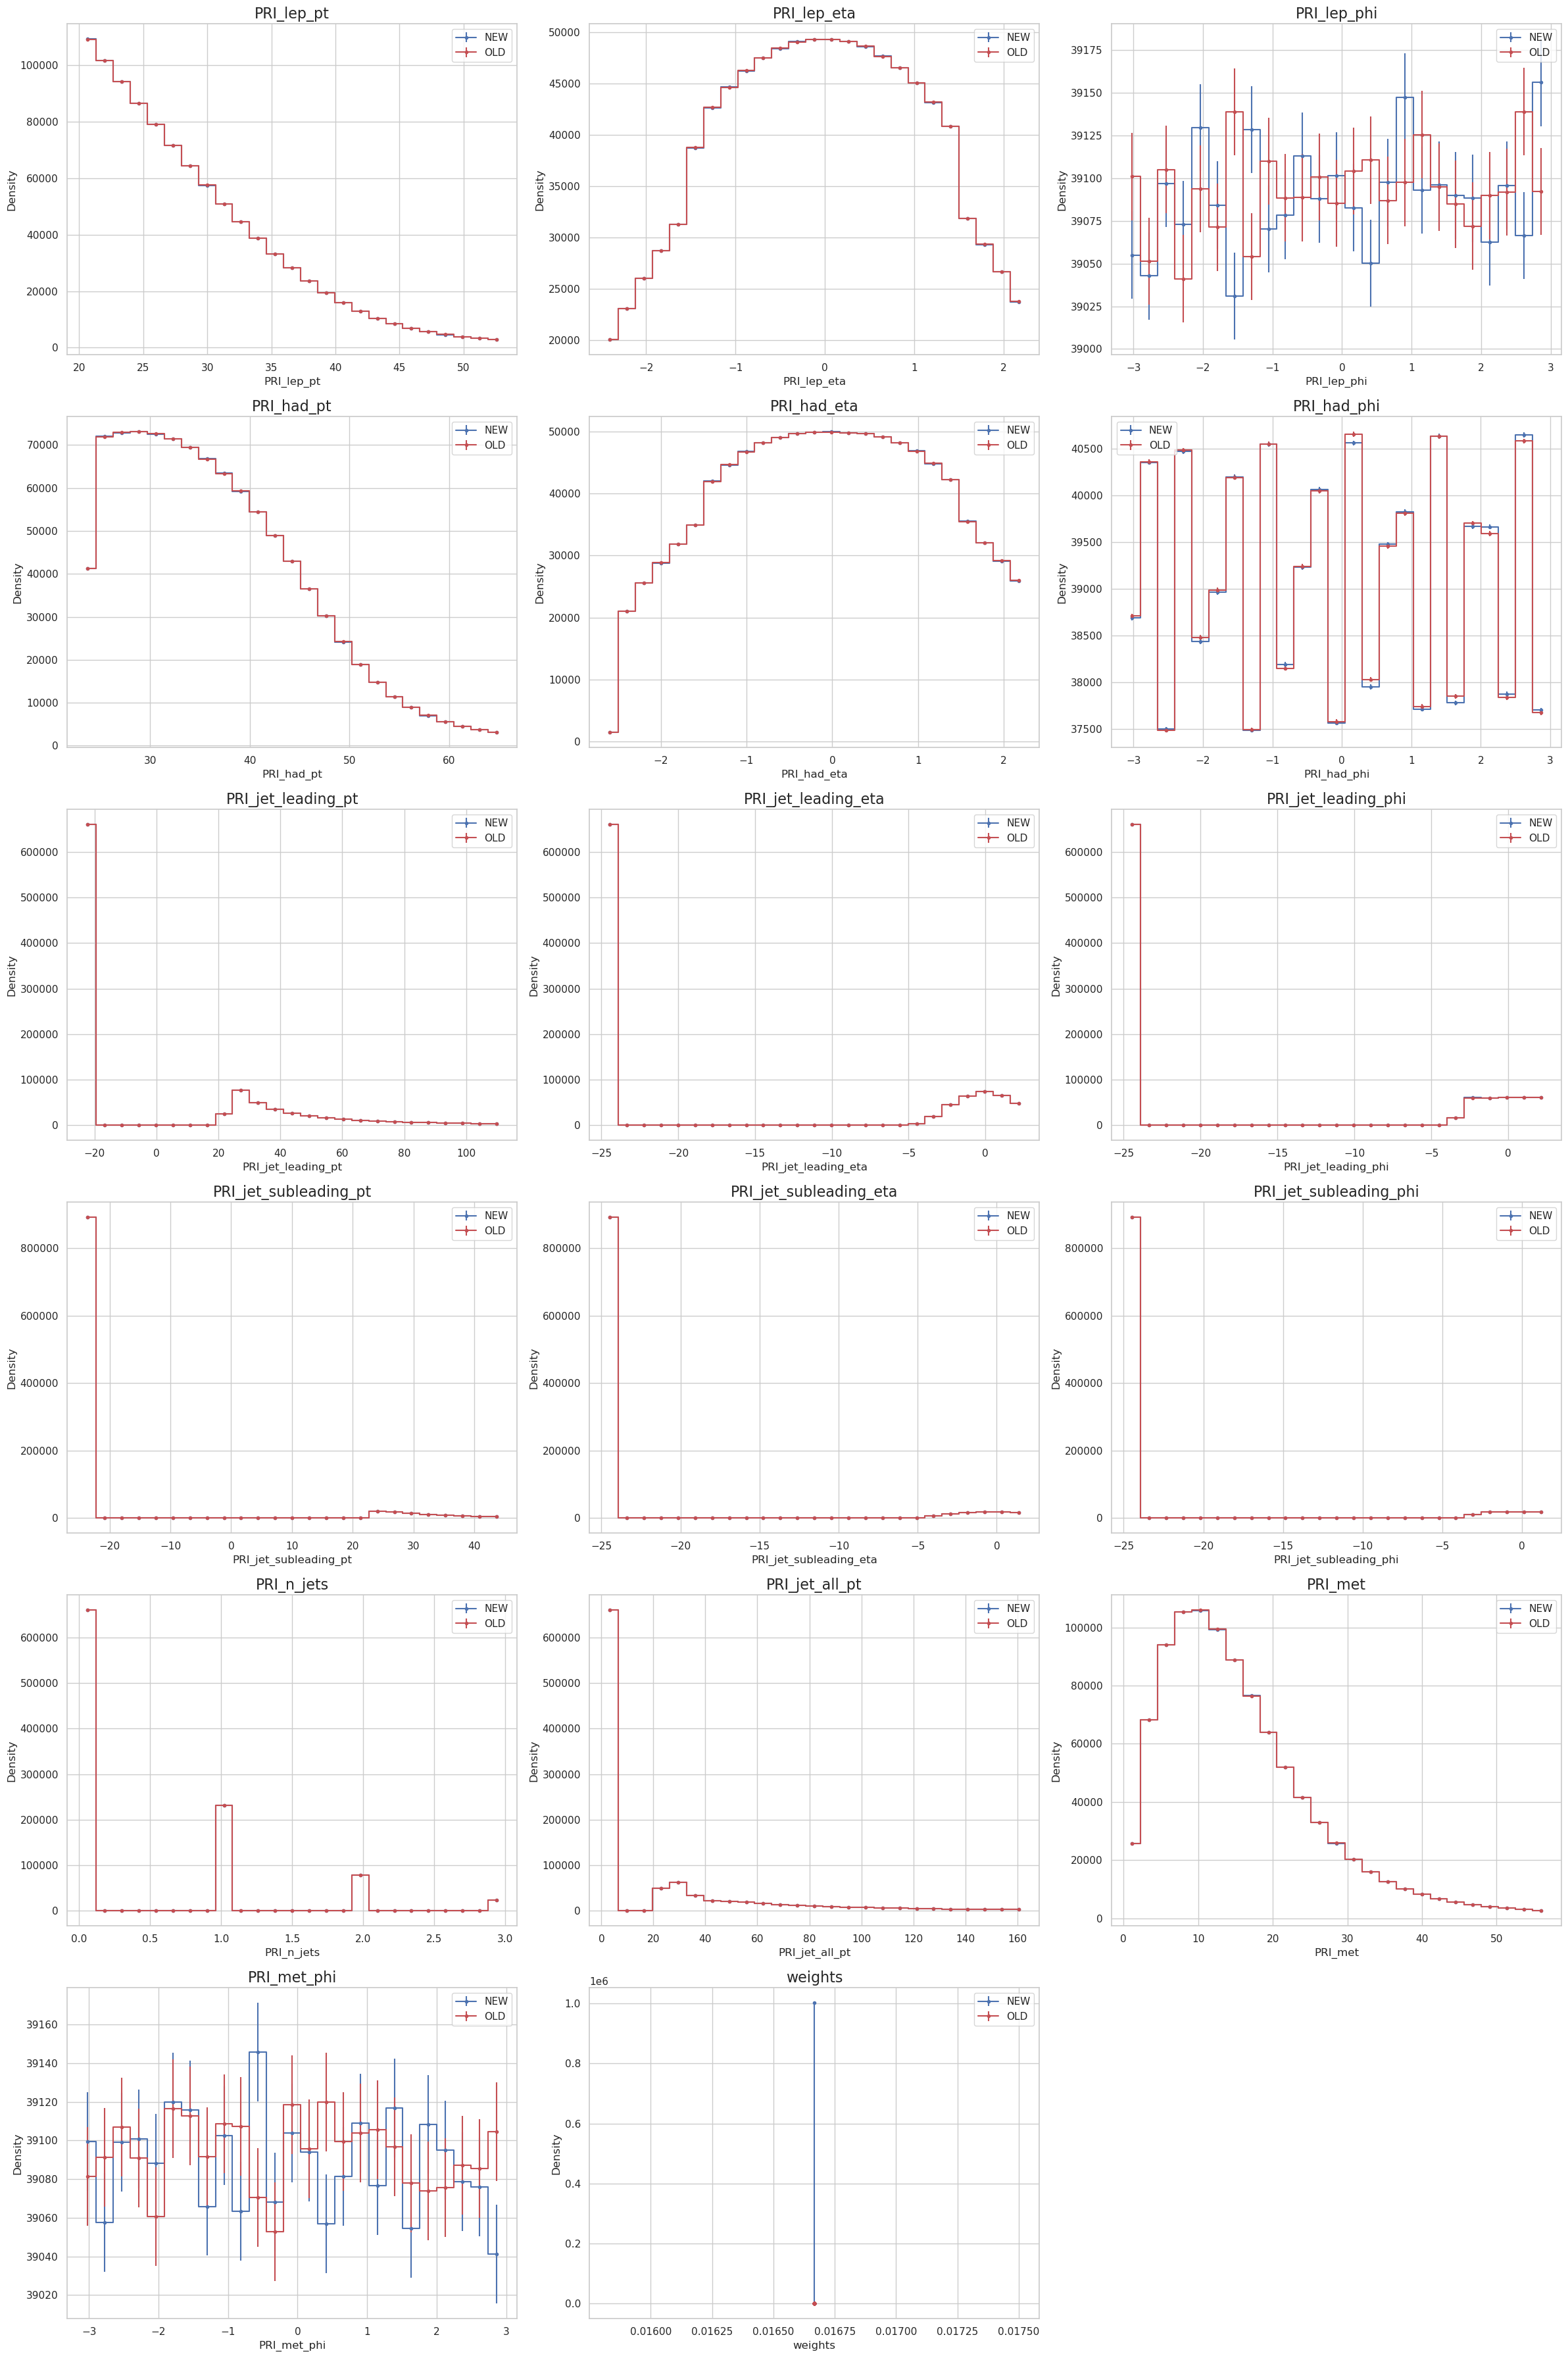

                           diboson                             


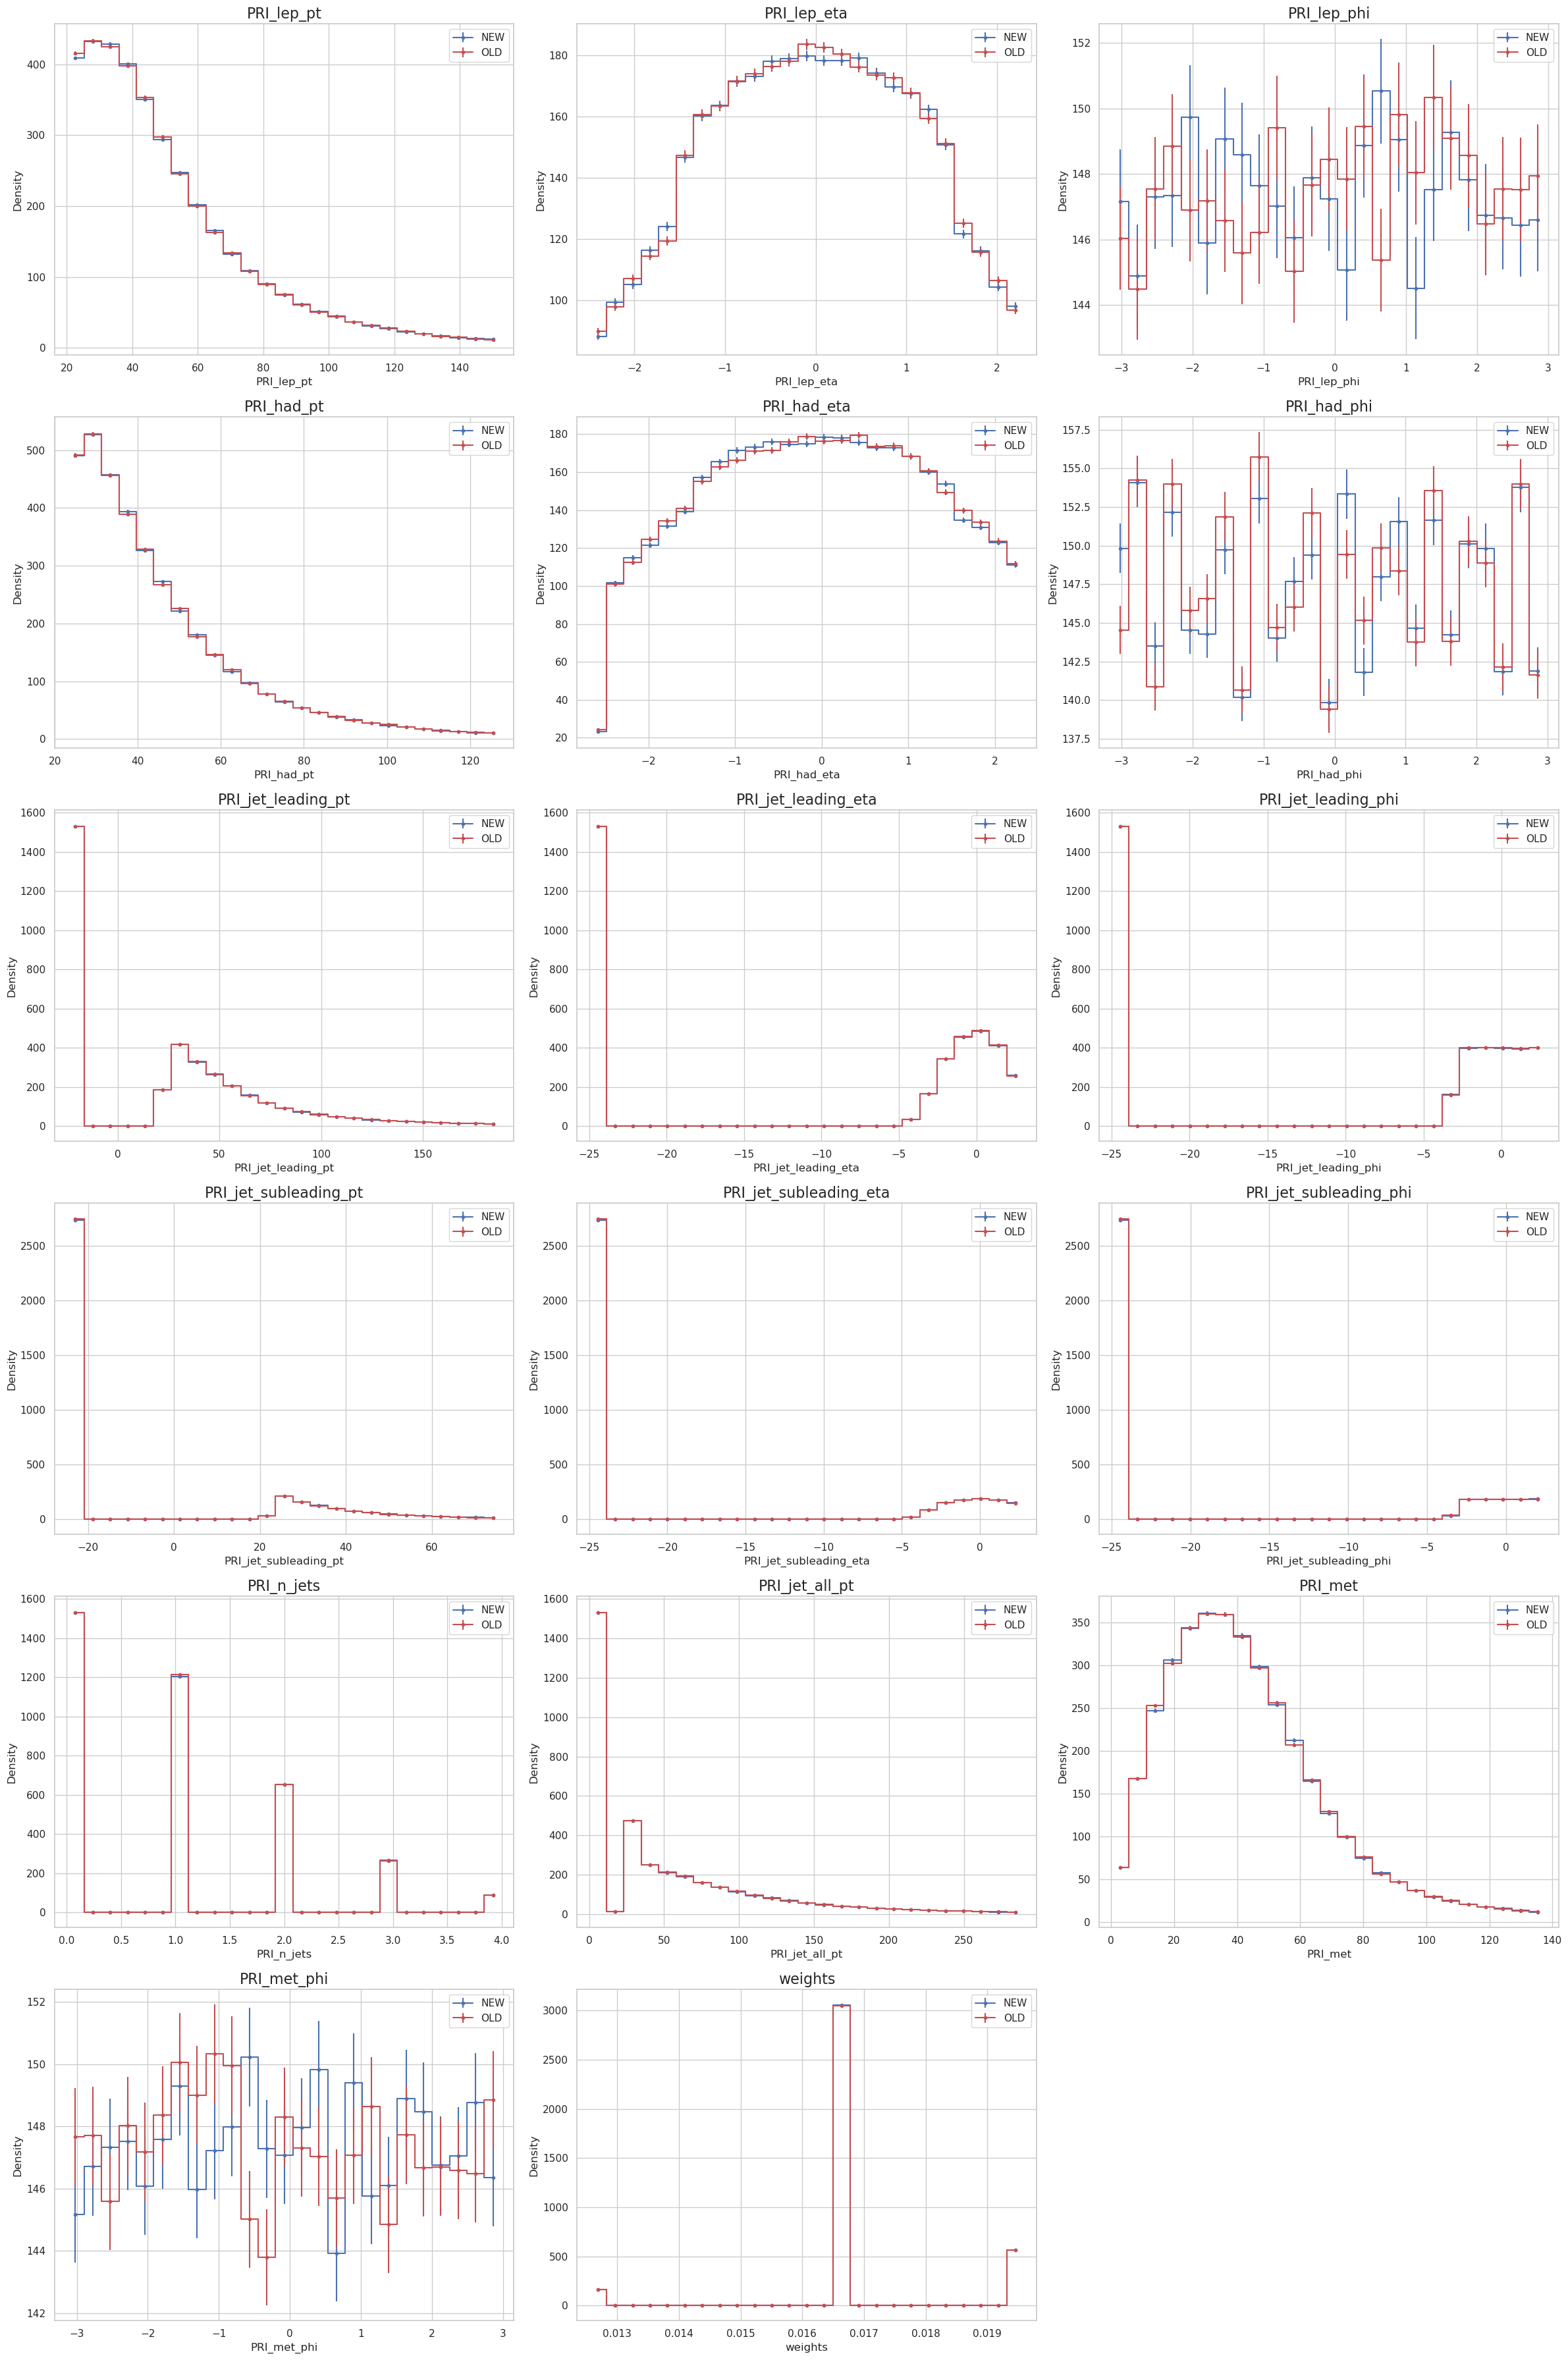

                           ttbar                             


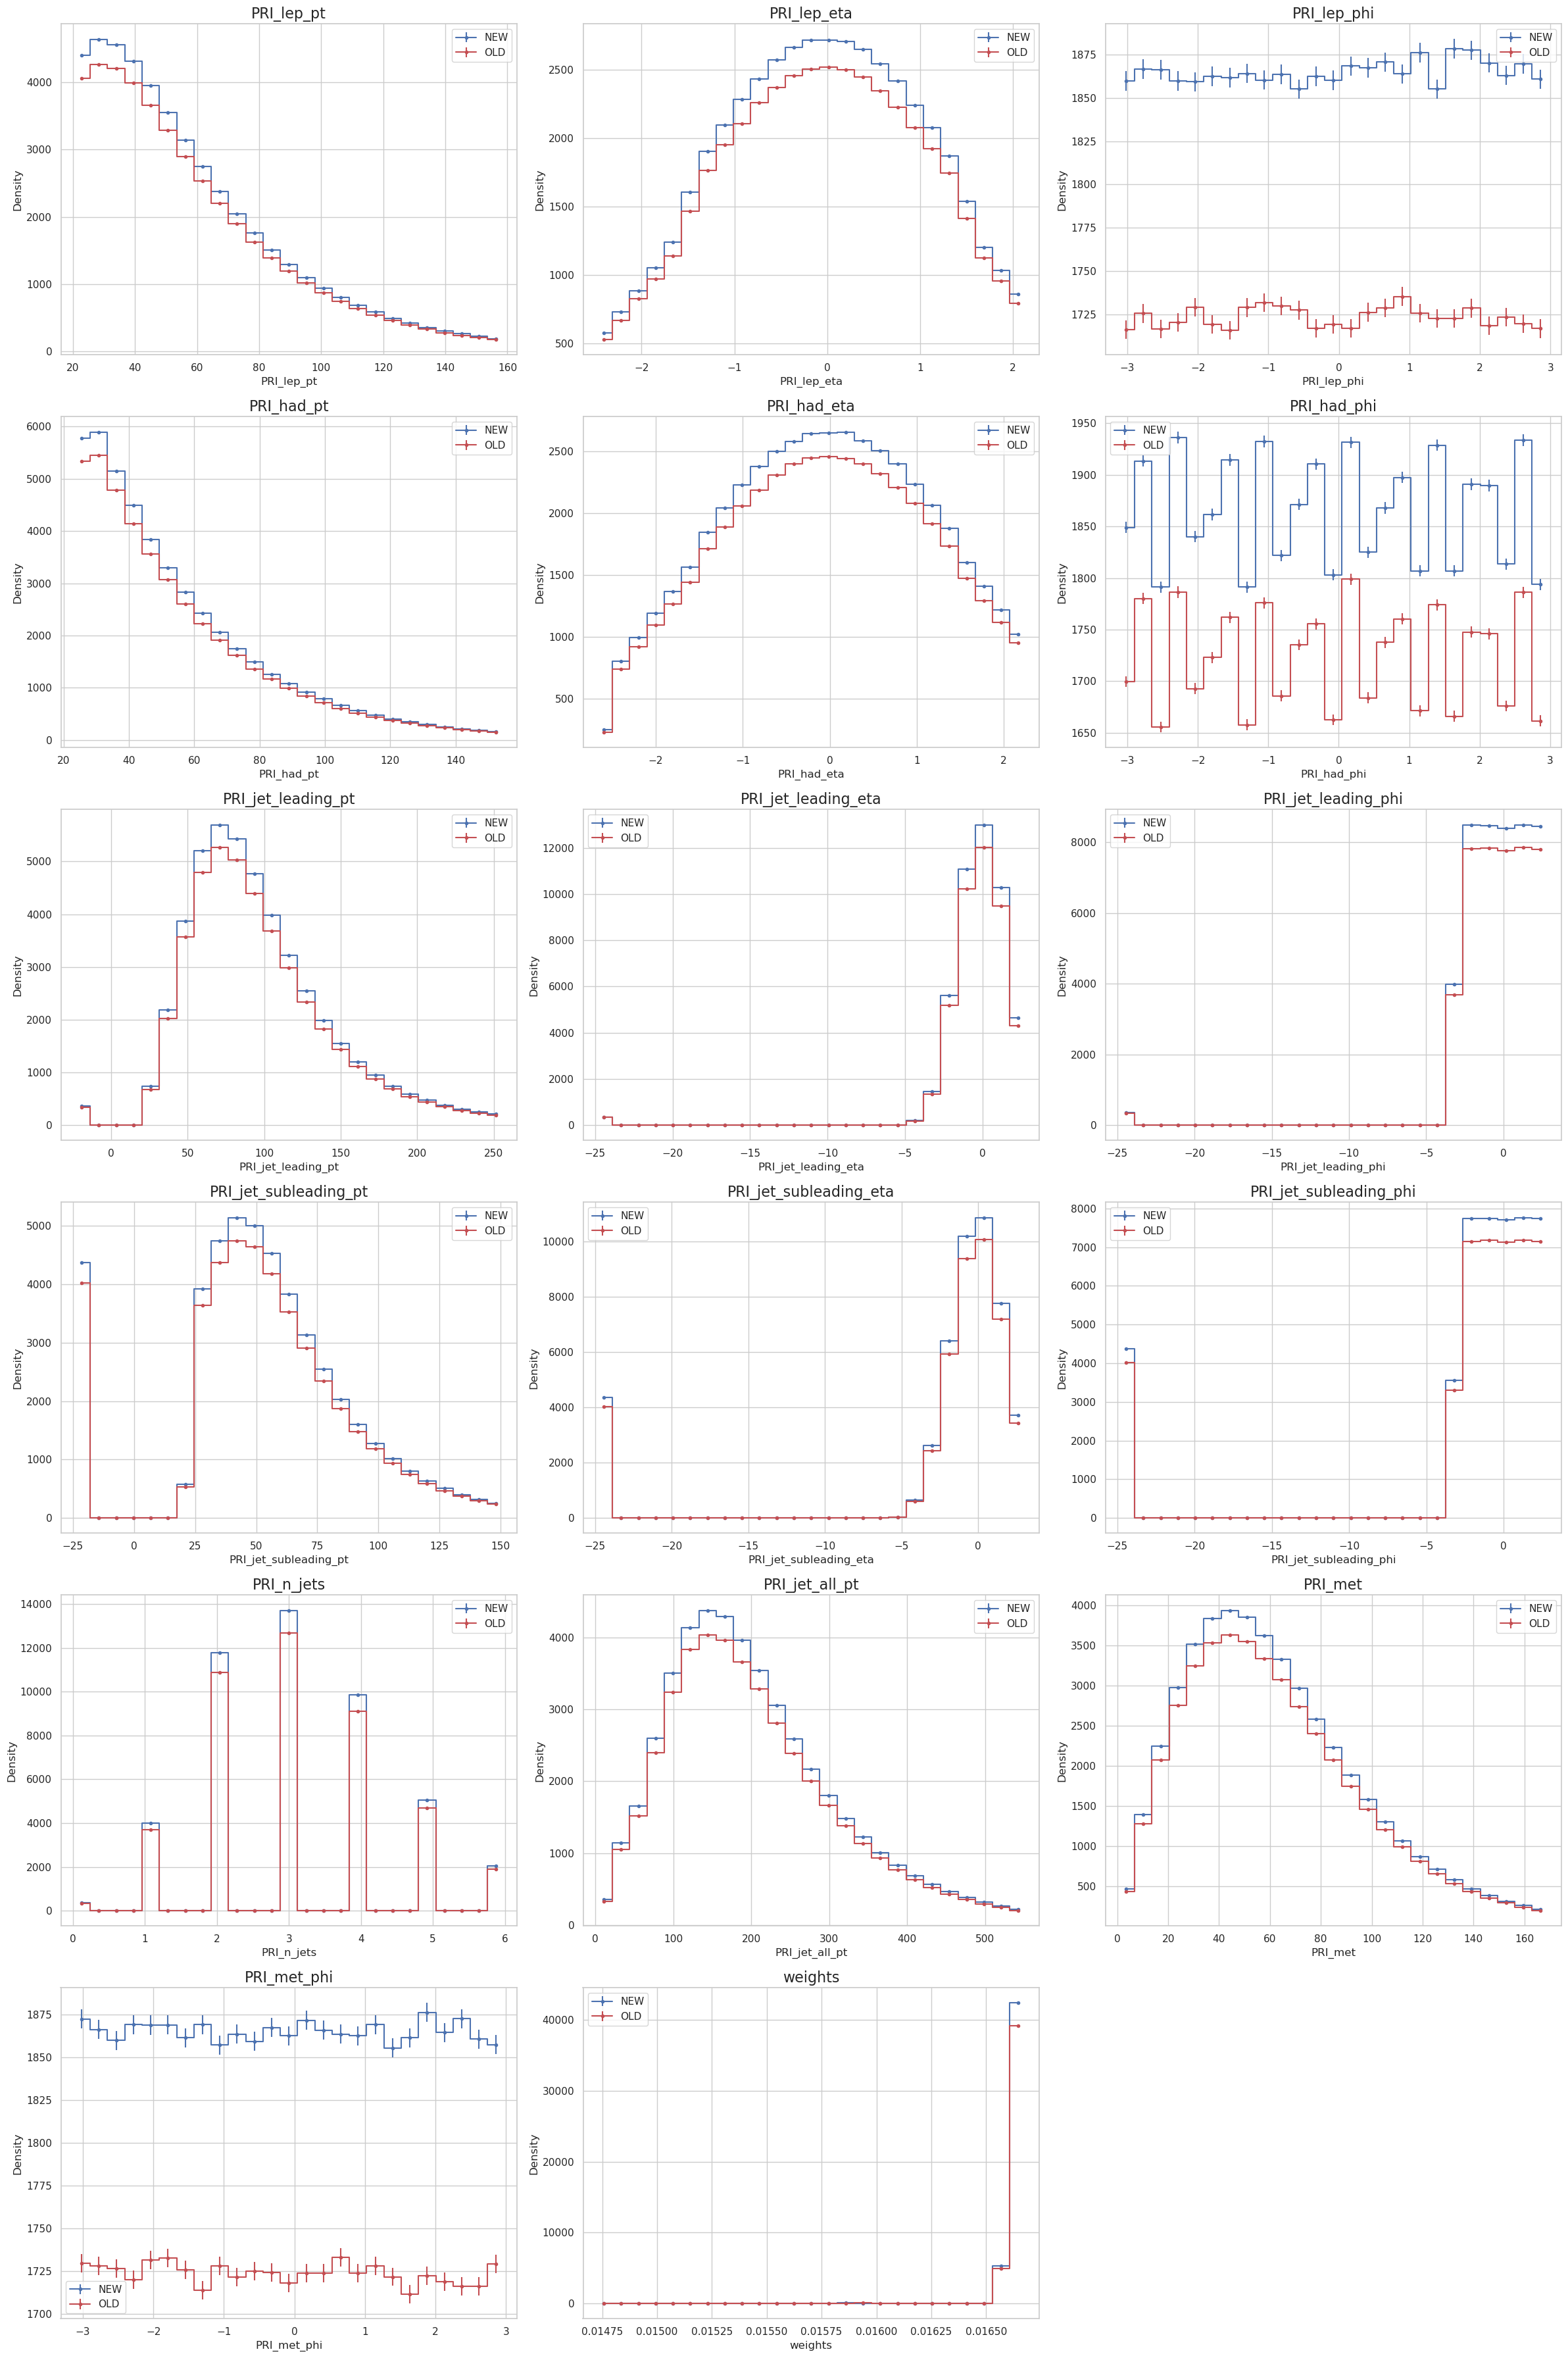

                           htautau                             


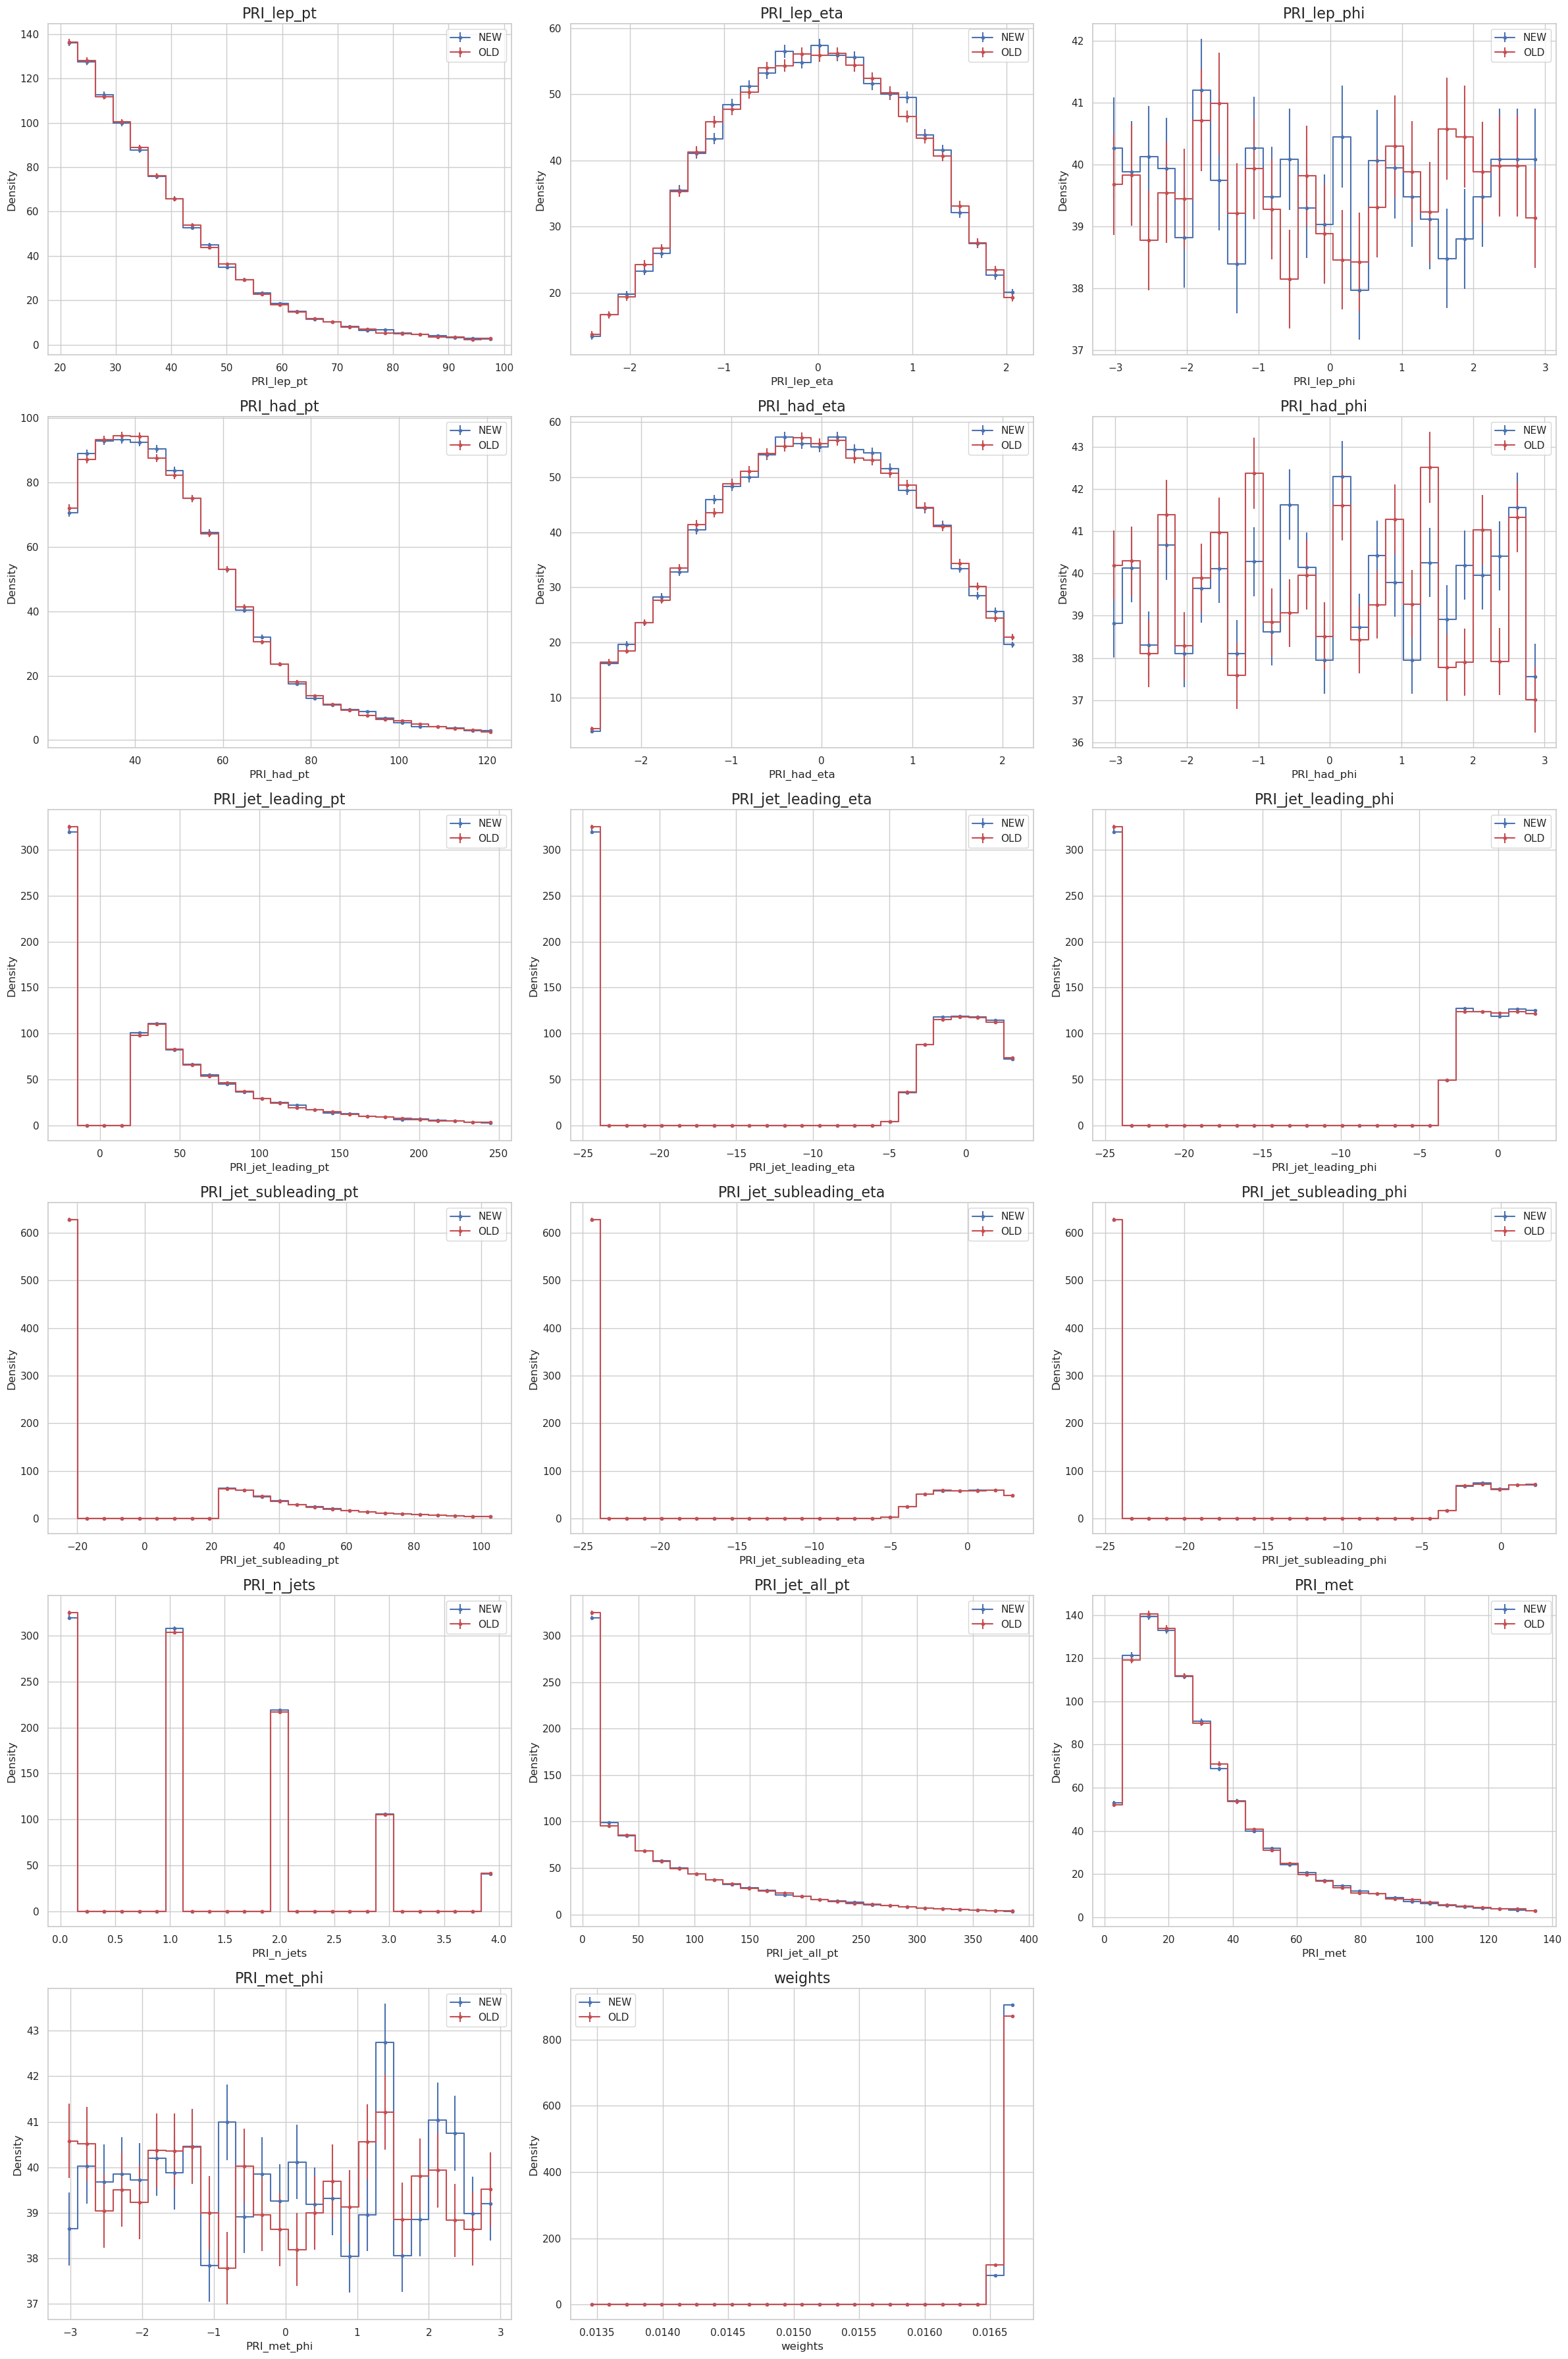

In [7]:
histogram_compare(data_new.get_test_set(),data_old.get_test_set(),nbin=25)

                           ztautau                             
                           diboson                             
                           ttbar                             
                           htautau                             


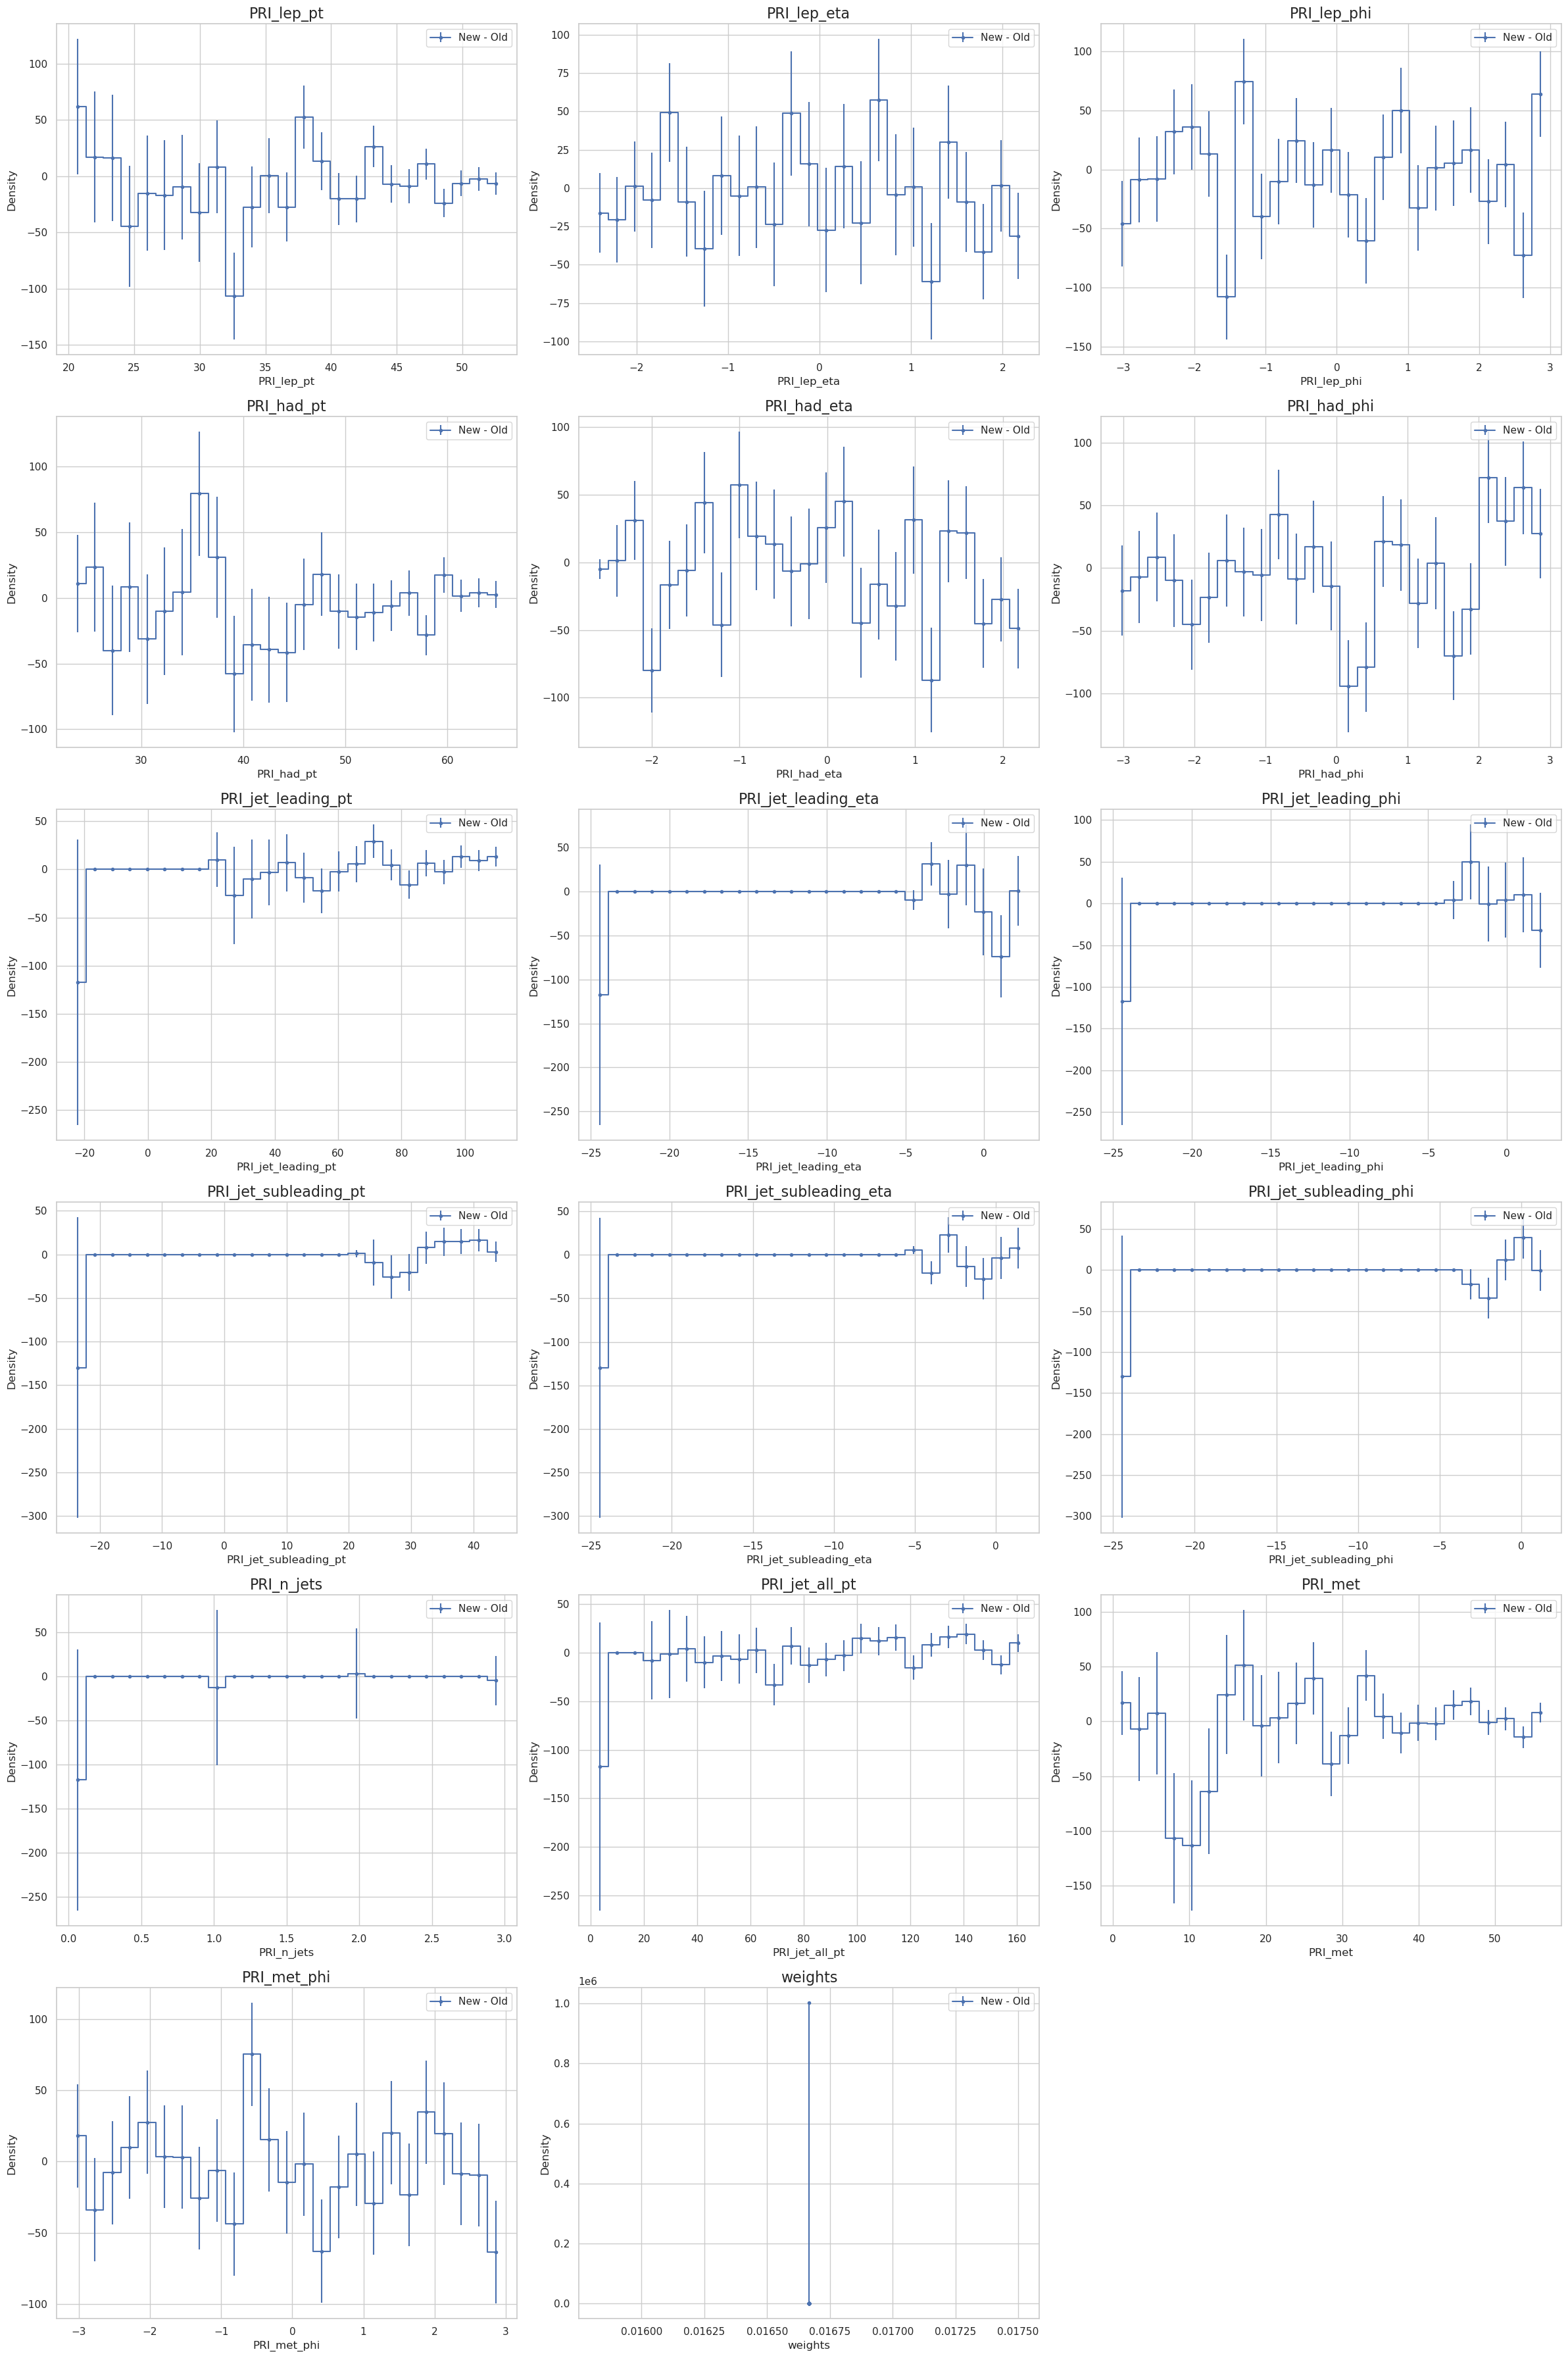

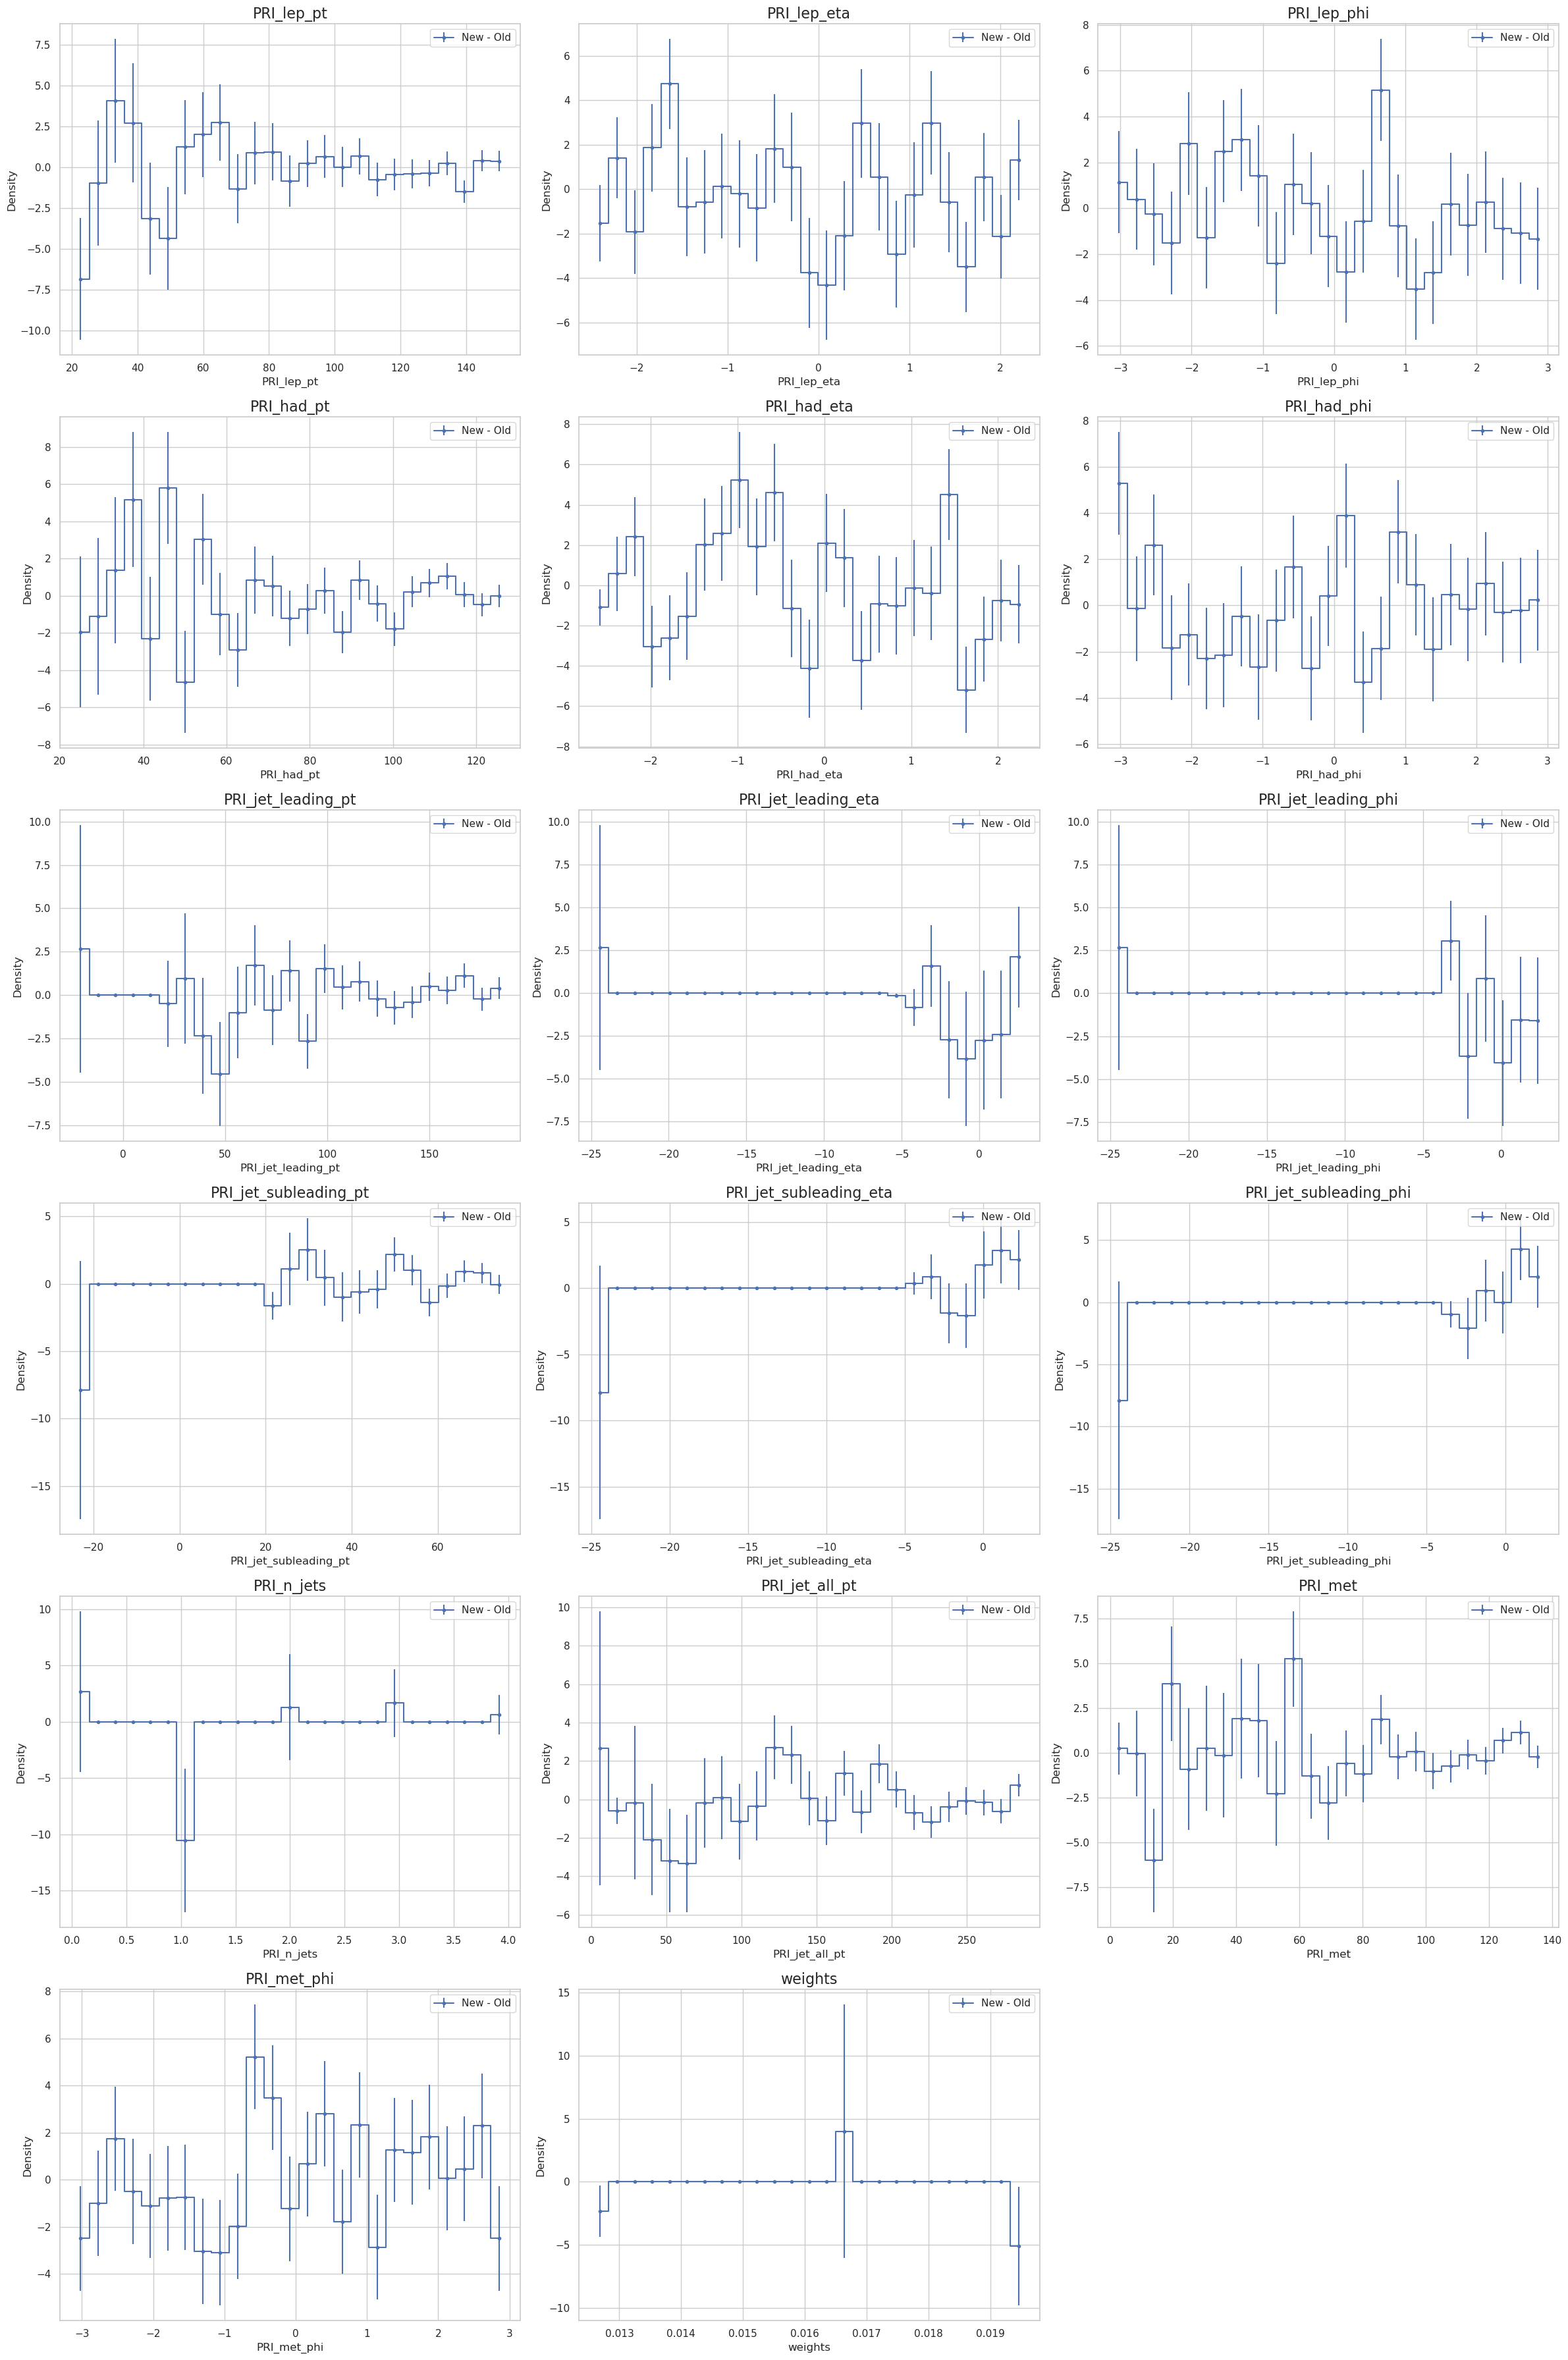

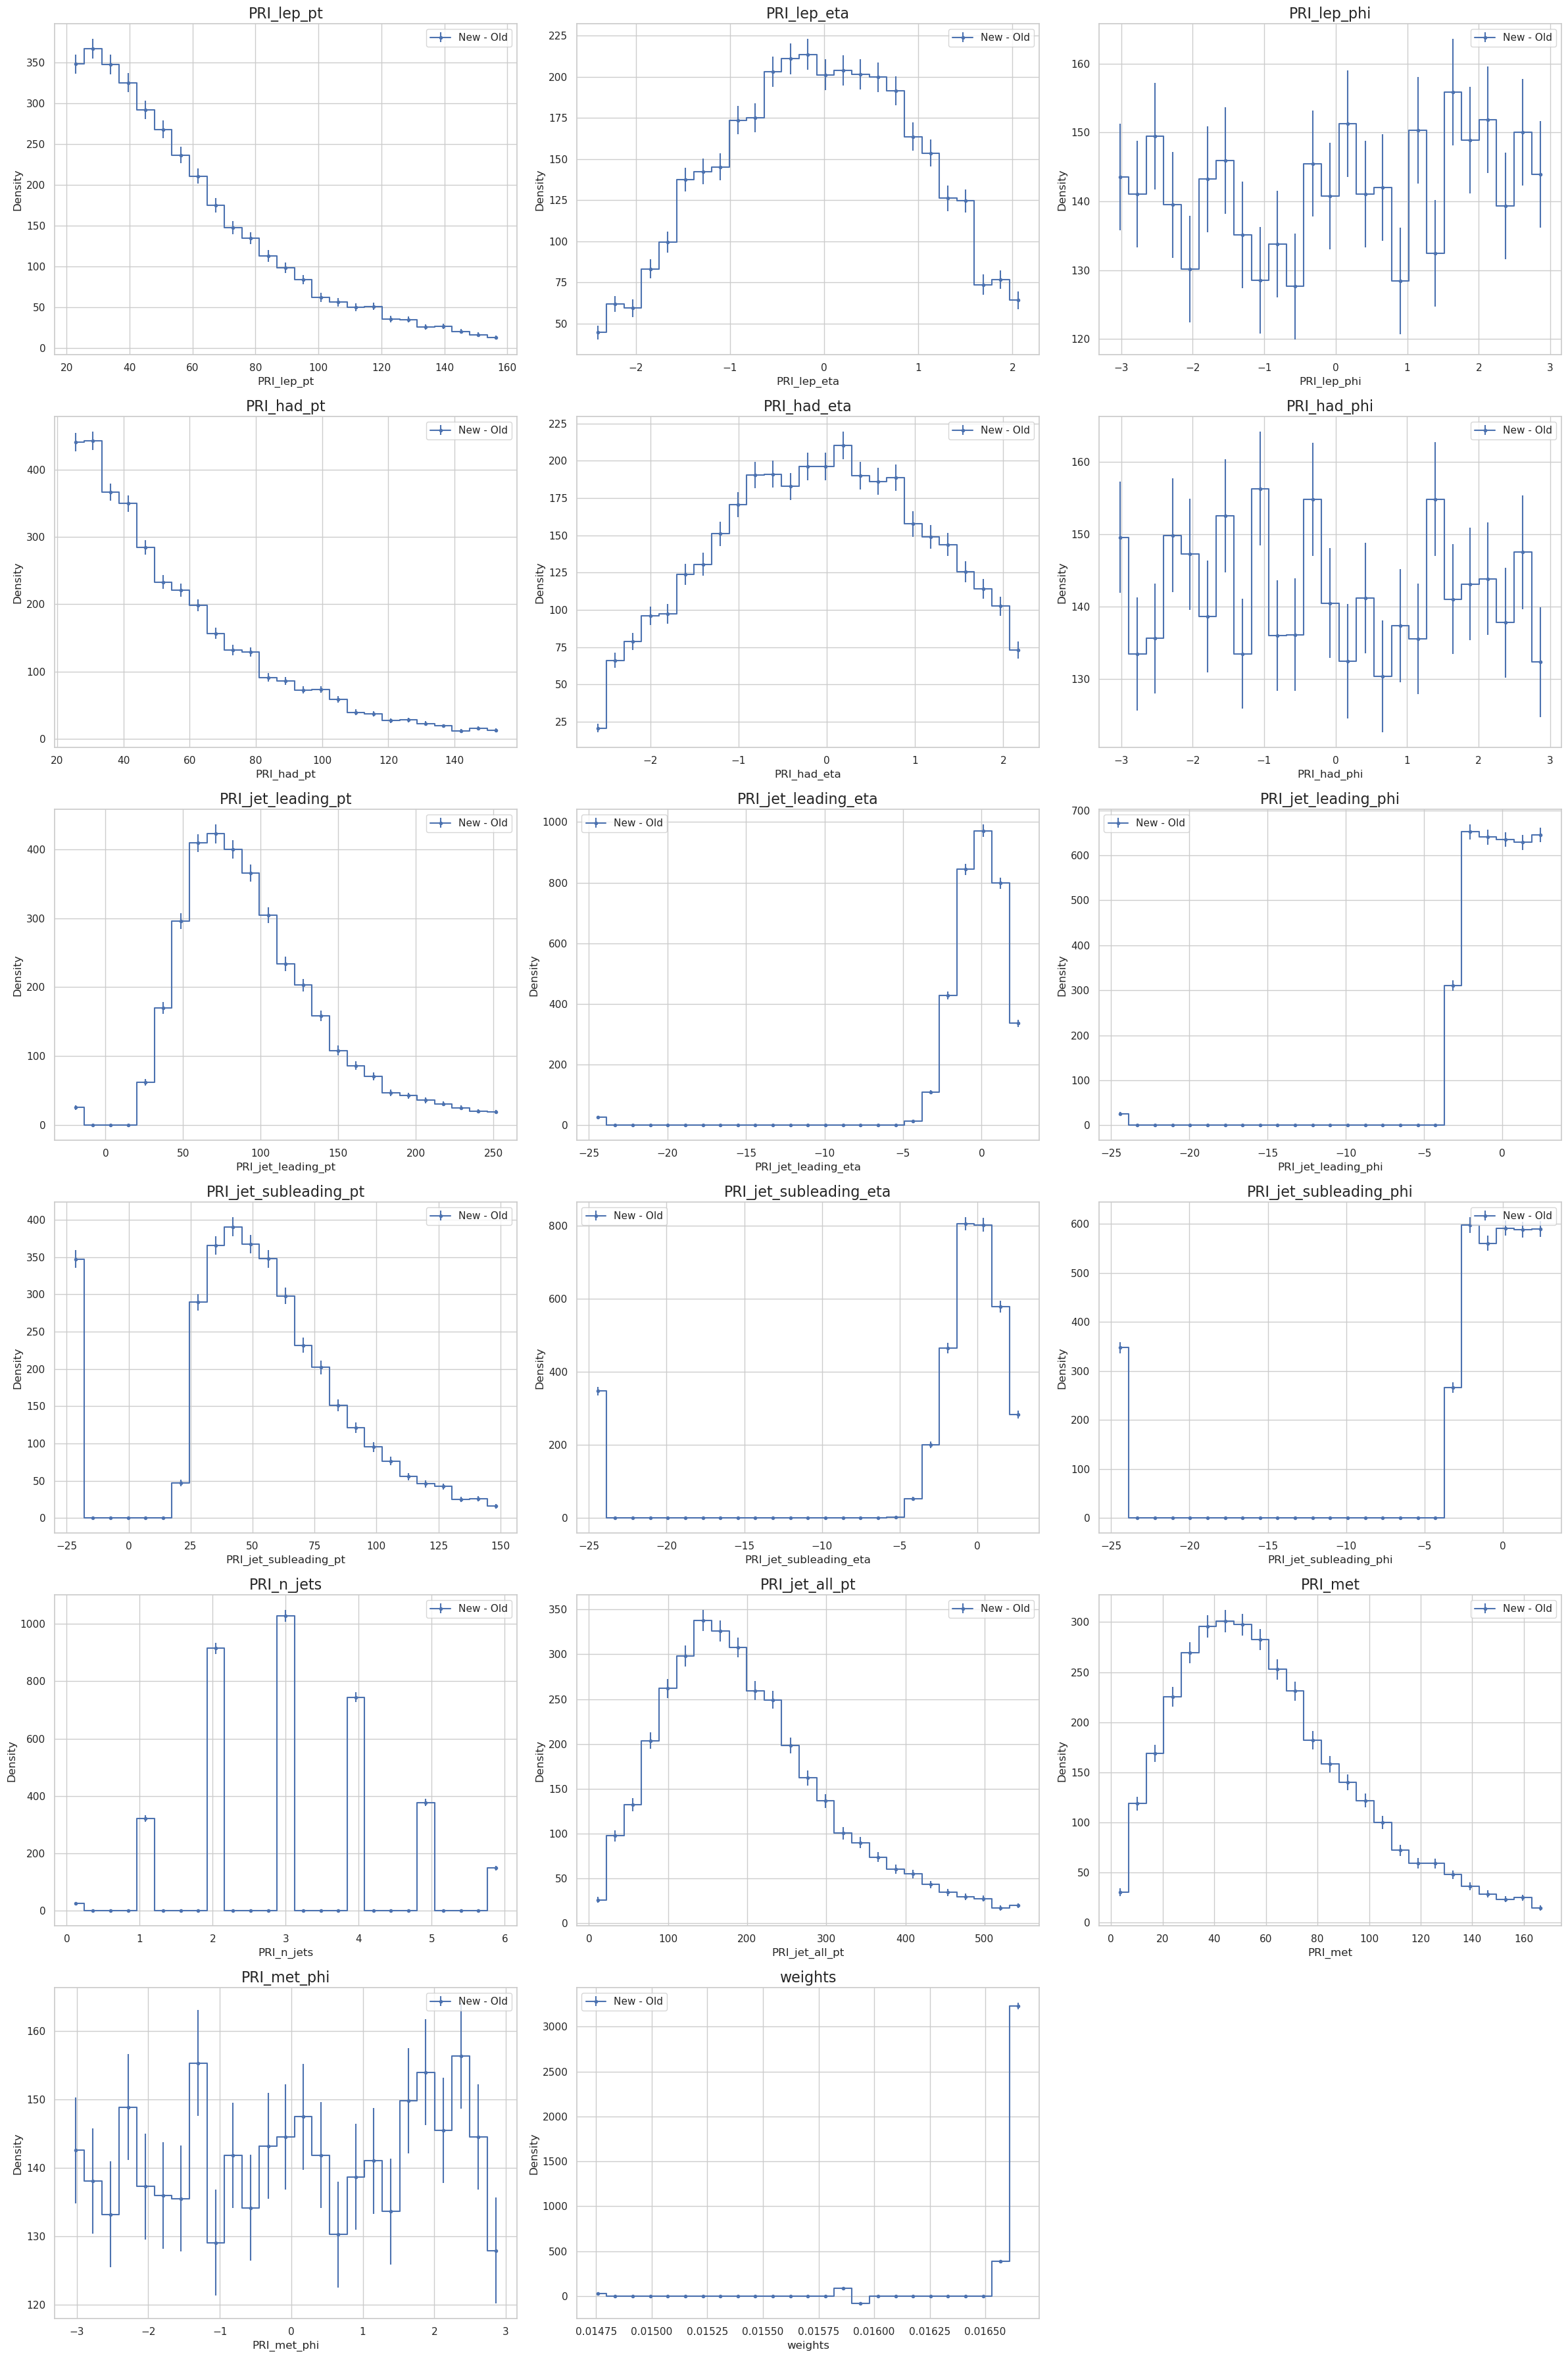

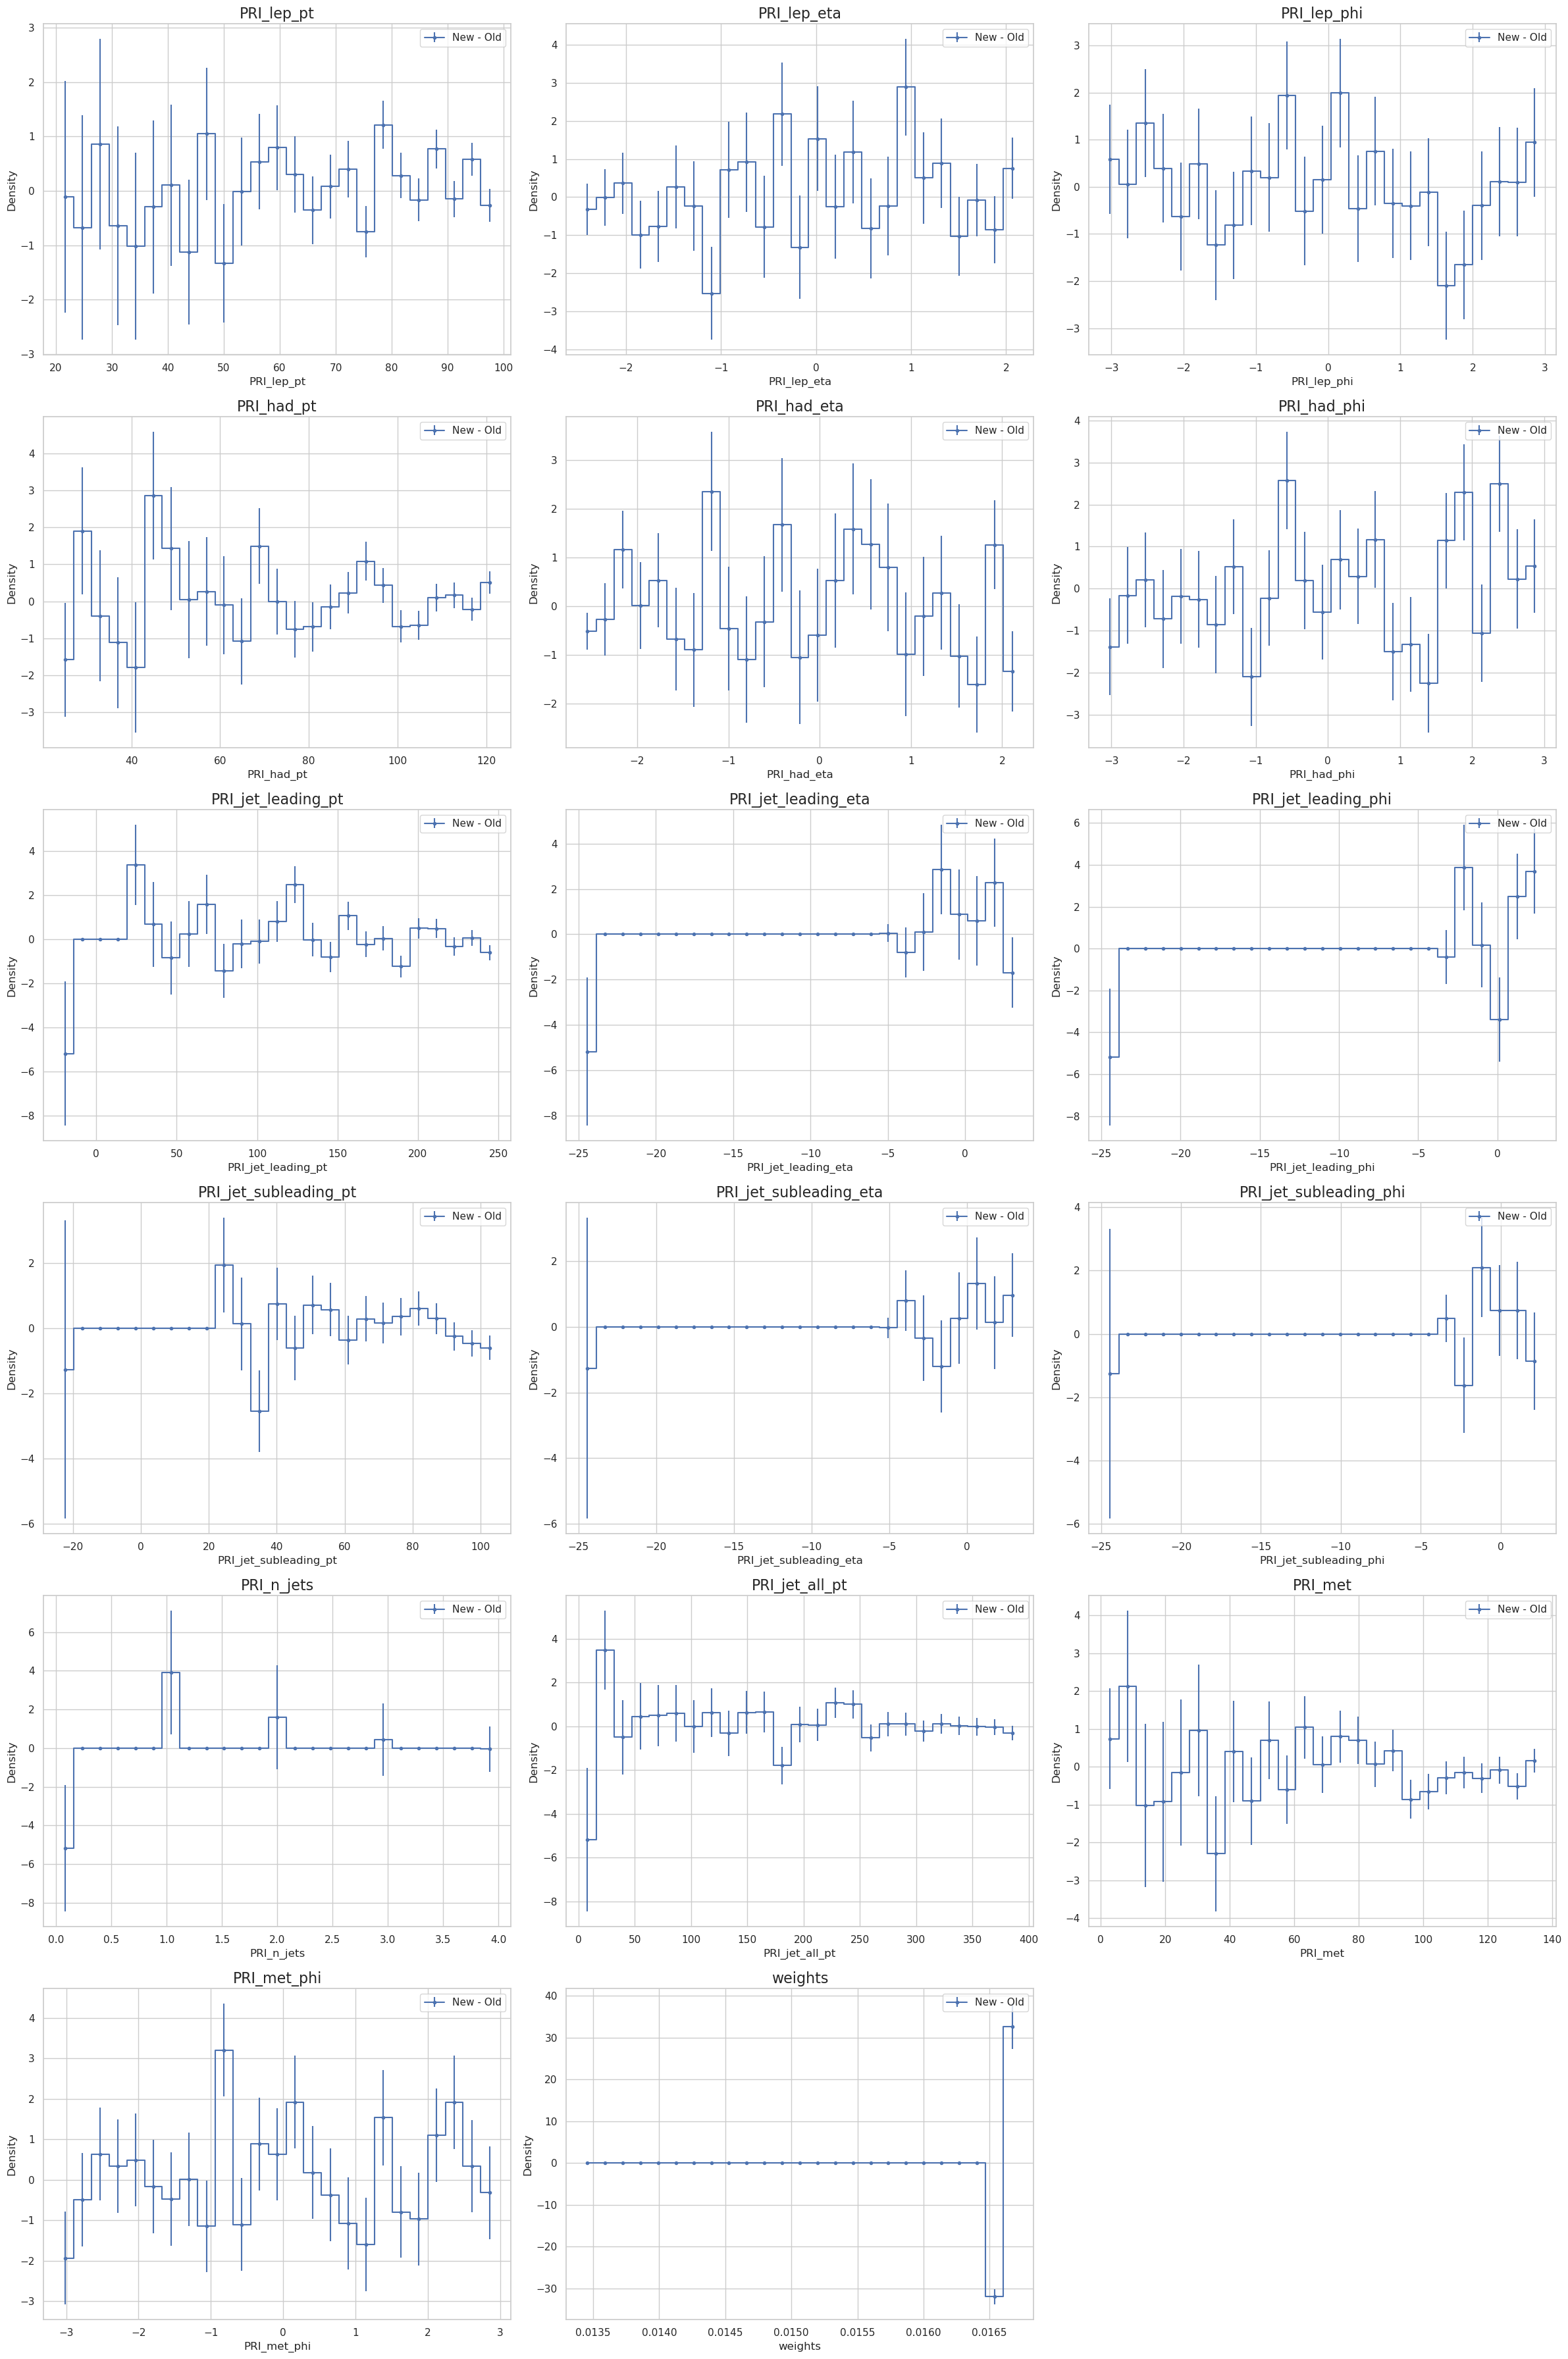

In [14]:
histogram_diff(data_new.get_test_set(),data_old.get_test_set(),nbin=25)

In [16]:

def reweight(data_set_new, data_set_old):

    for key in data_set_new.keys():
        print("=============================================================")
        print(f"                           {key}                             ")
        print("=============================================================")
        if key not in data_set_old.keys():
            print("The data set is not the same")
            raise ValueError("The data set is not the same")


        df_new = data_set_new[key]
        df_old = data_set_old[key]
        
        weights_new = df_new["weights"]
        weights_old = df_old["weights"]

        sum_weights_old = np.sum(df_old["weights"])
        sum_weights_new = np.sum(df_new["weights"])
        

        df_new["weights"] = df_new["weights"] * sum_weights_old / sum_weights_new

        data_set_new[key] = df_new
    
    return data_set_new


In [17]:
data_set_new_re = reweight(data_new.get_test_set(),data_old.get_test_set())

                           ztautau                             
                           diboson                             
                           ttbar                             
                           htautau                             


In [18]:
# REWEIGHTING

                           ztautau                             


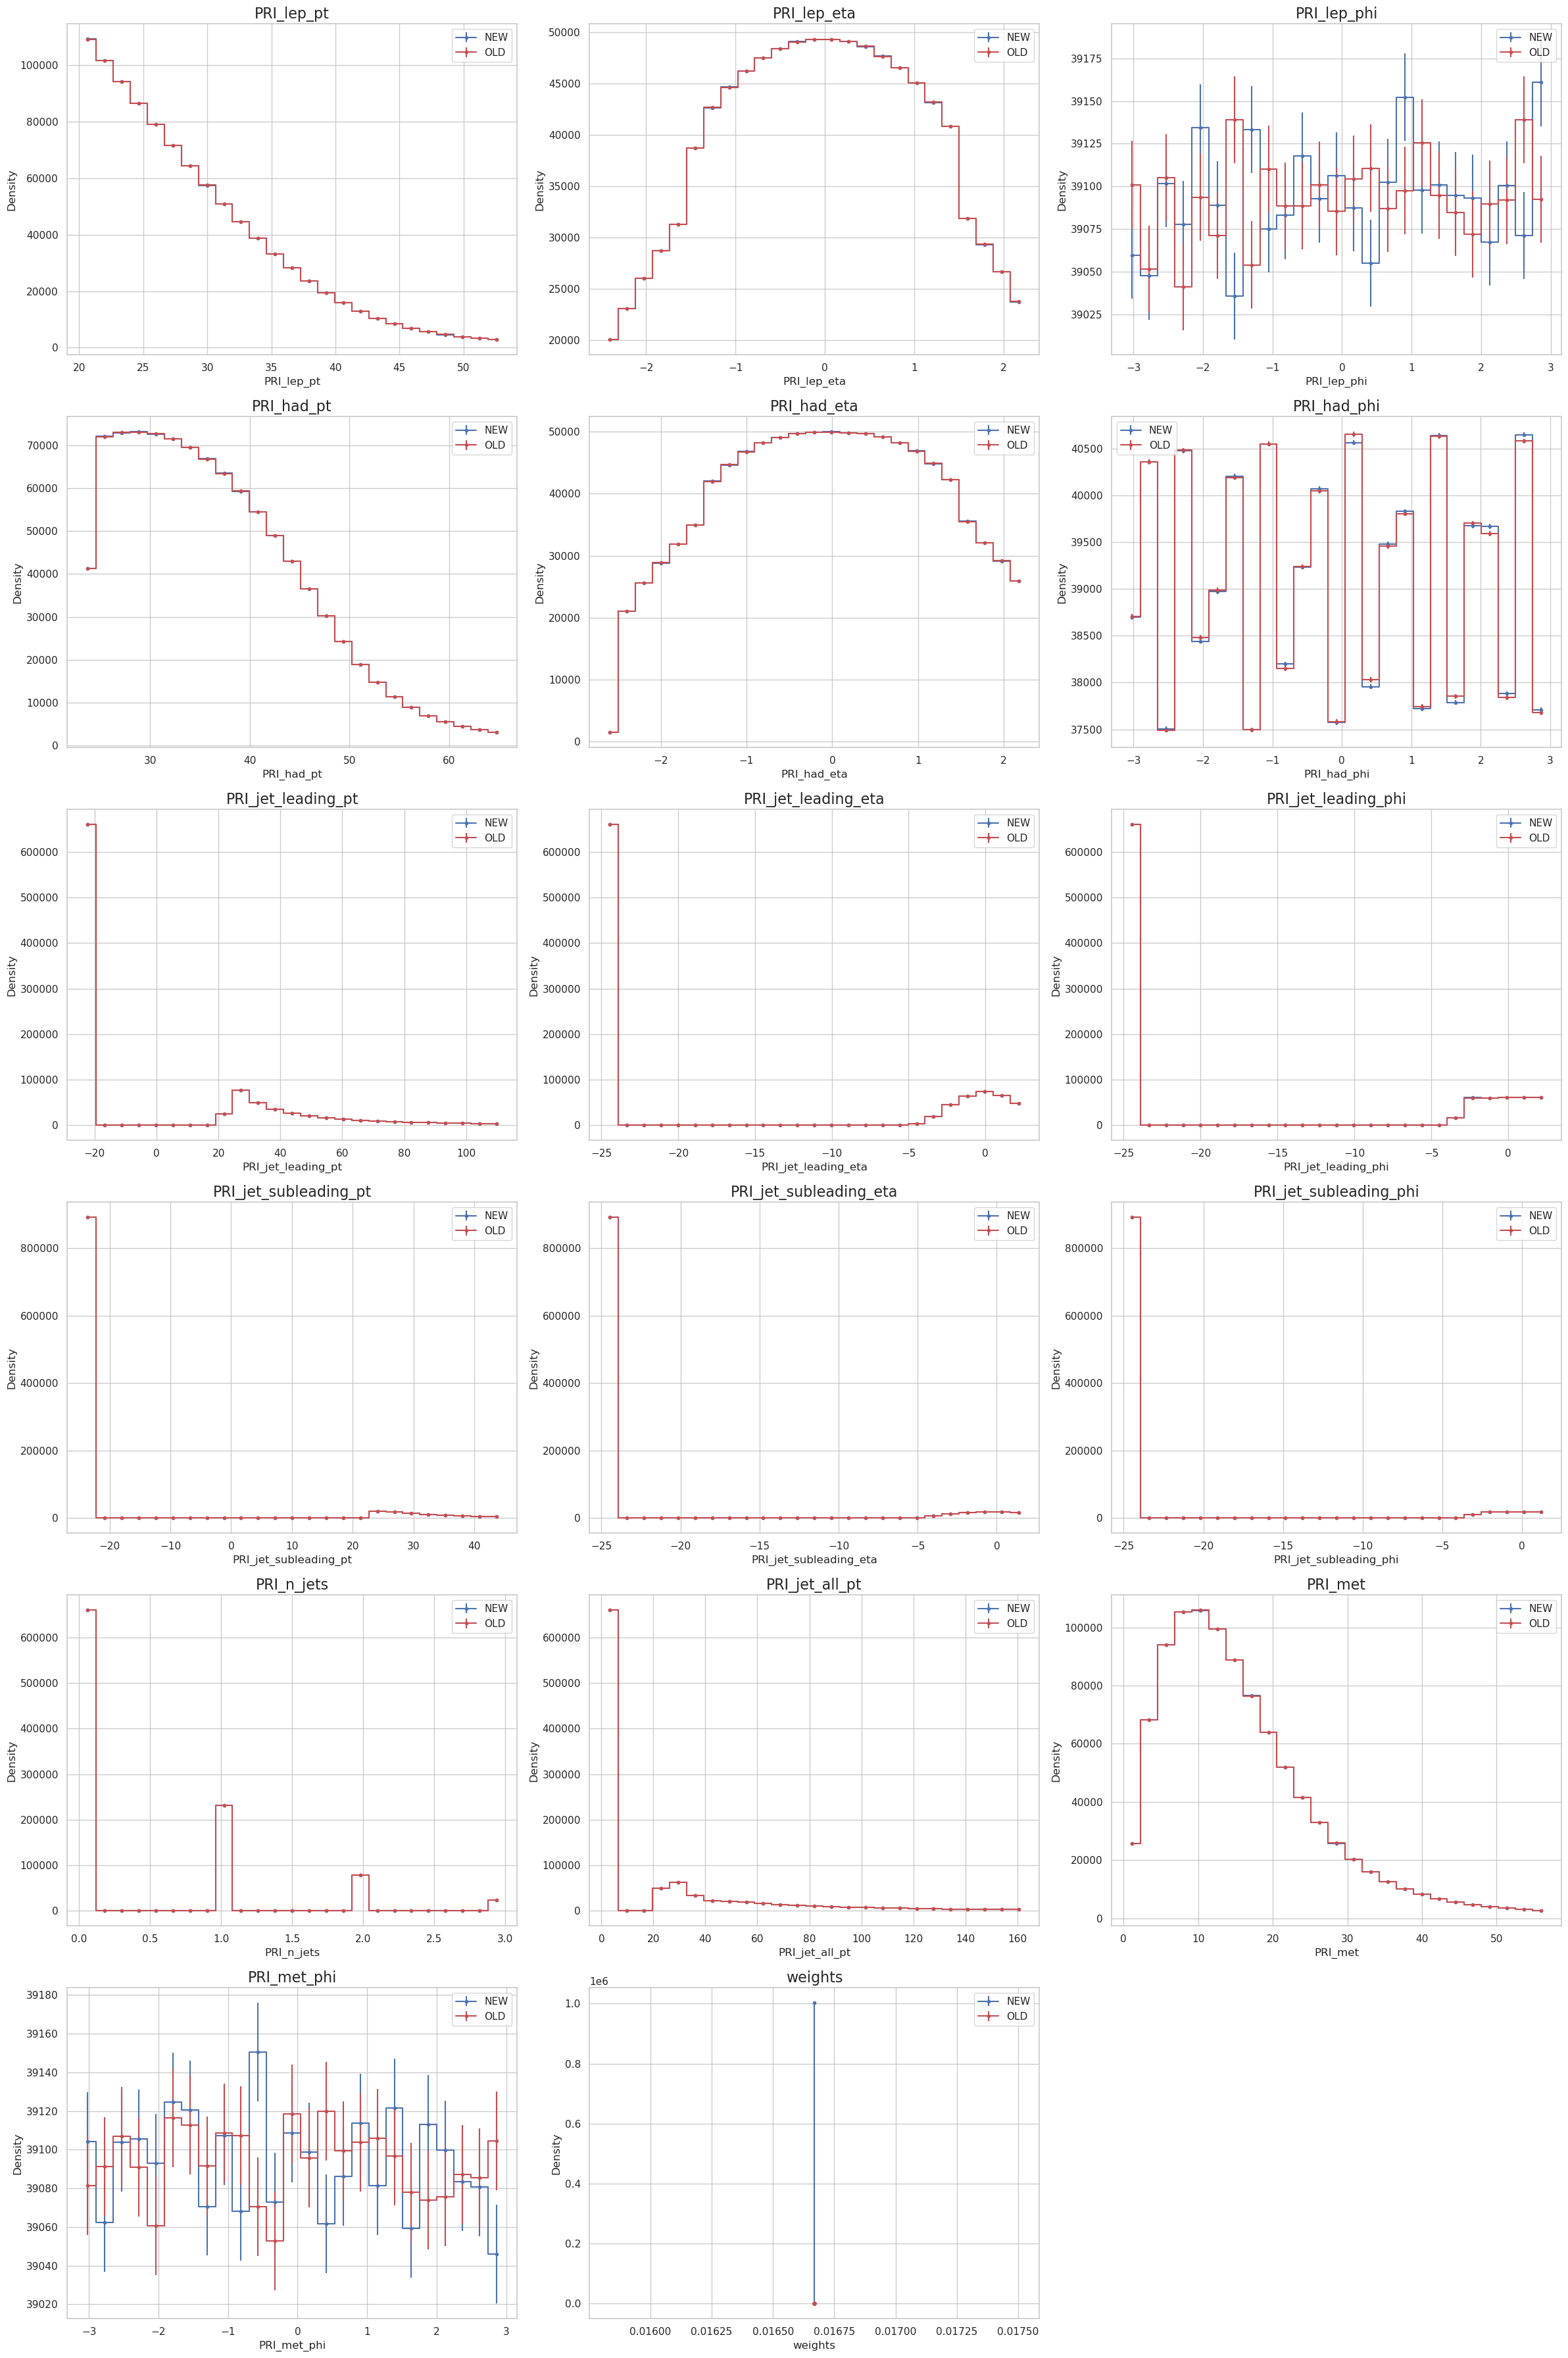

                           diboson                             


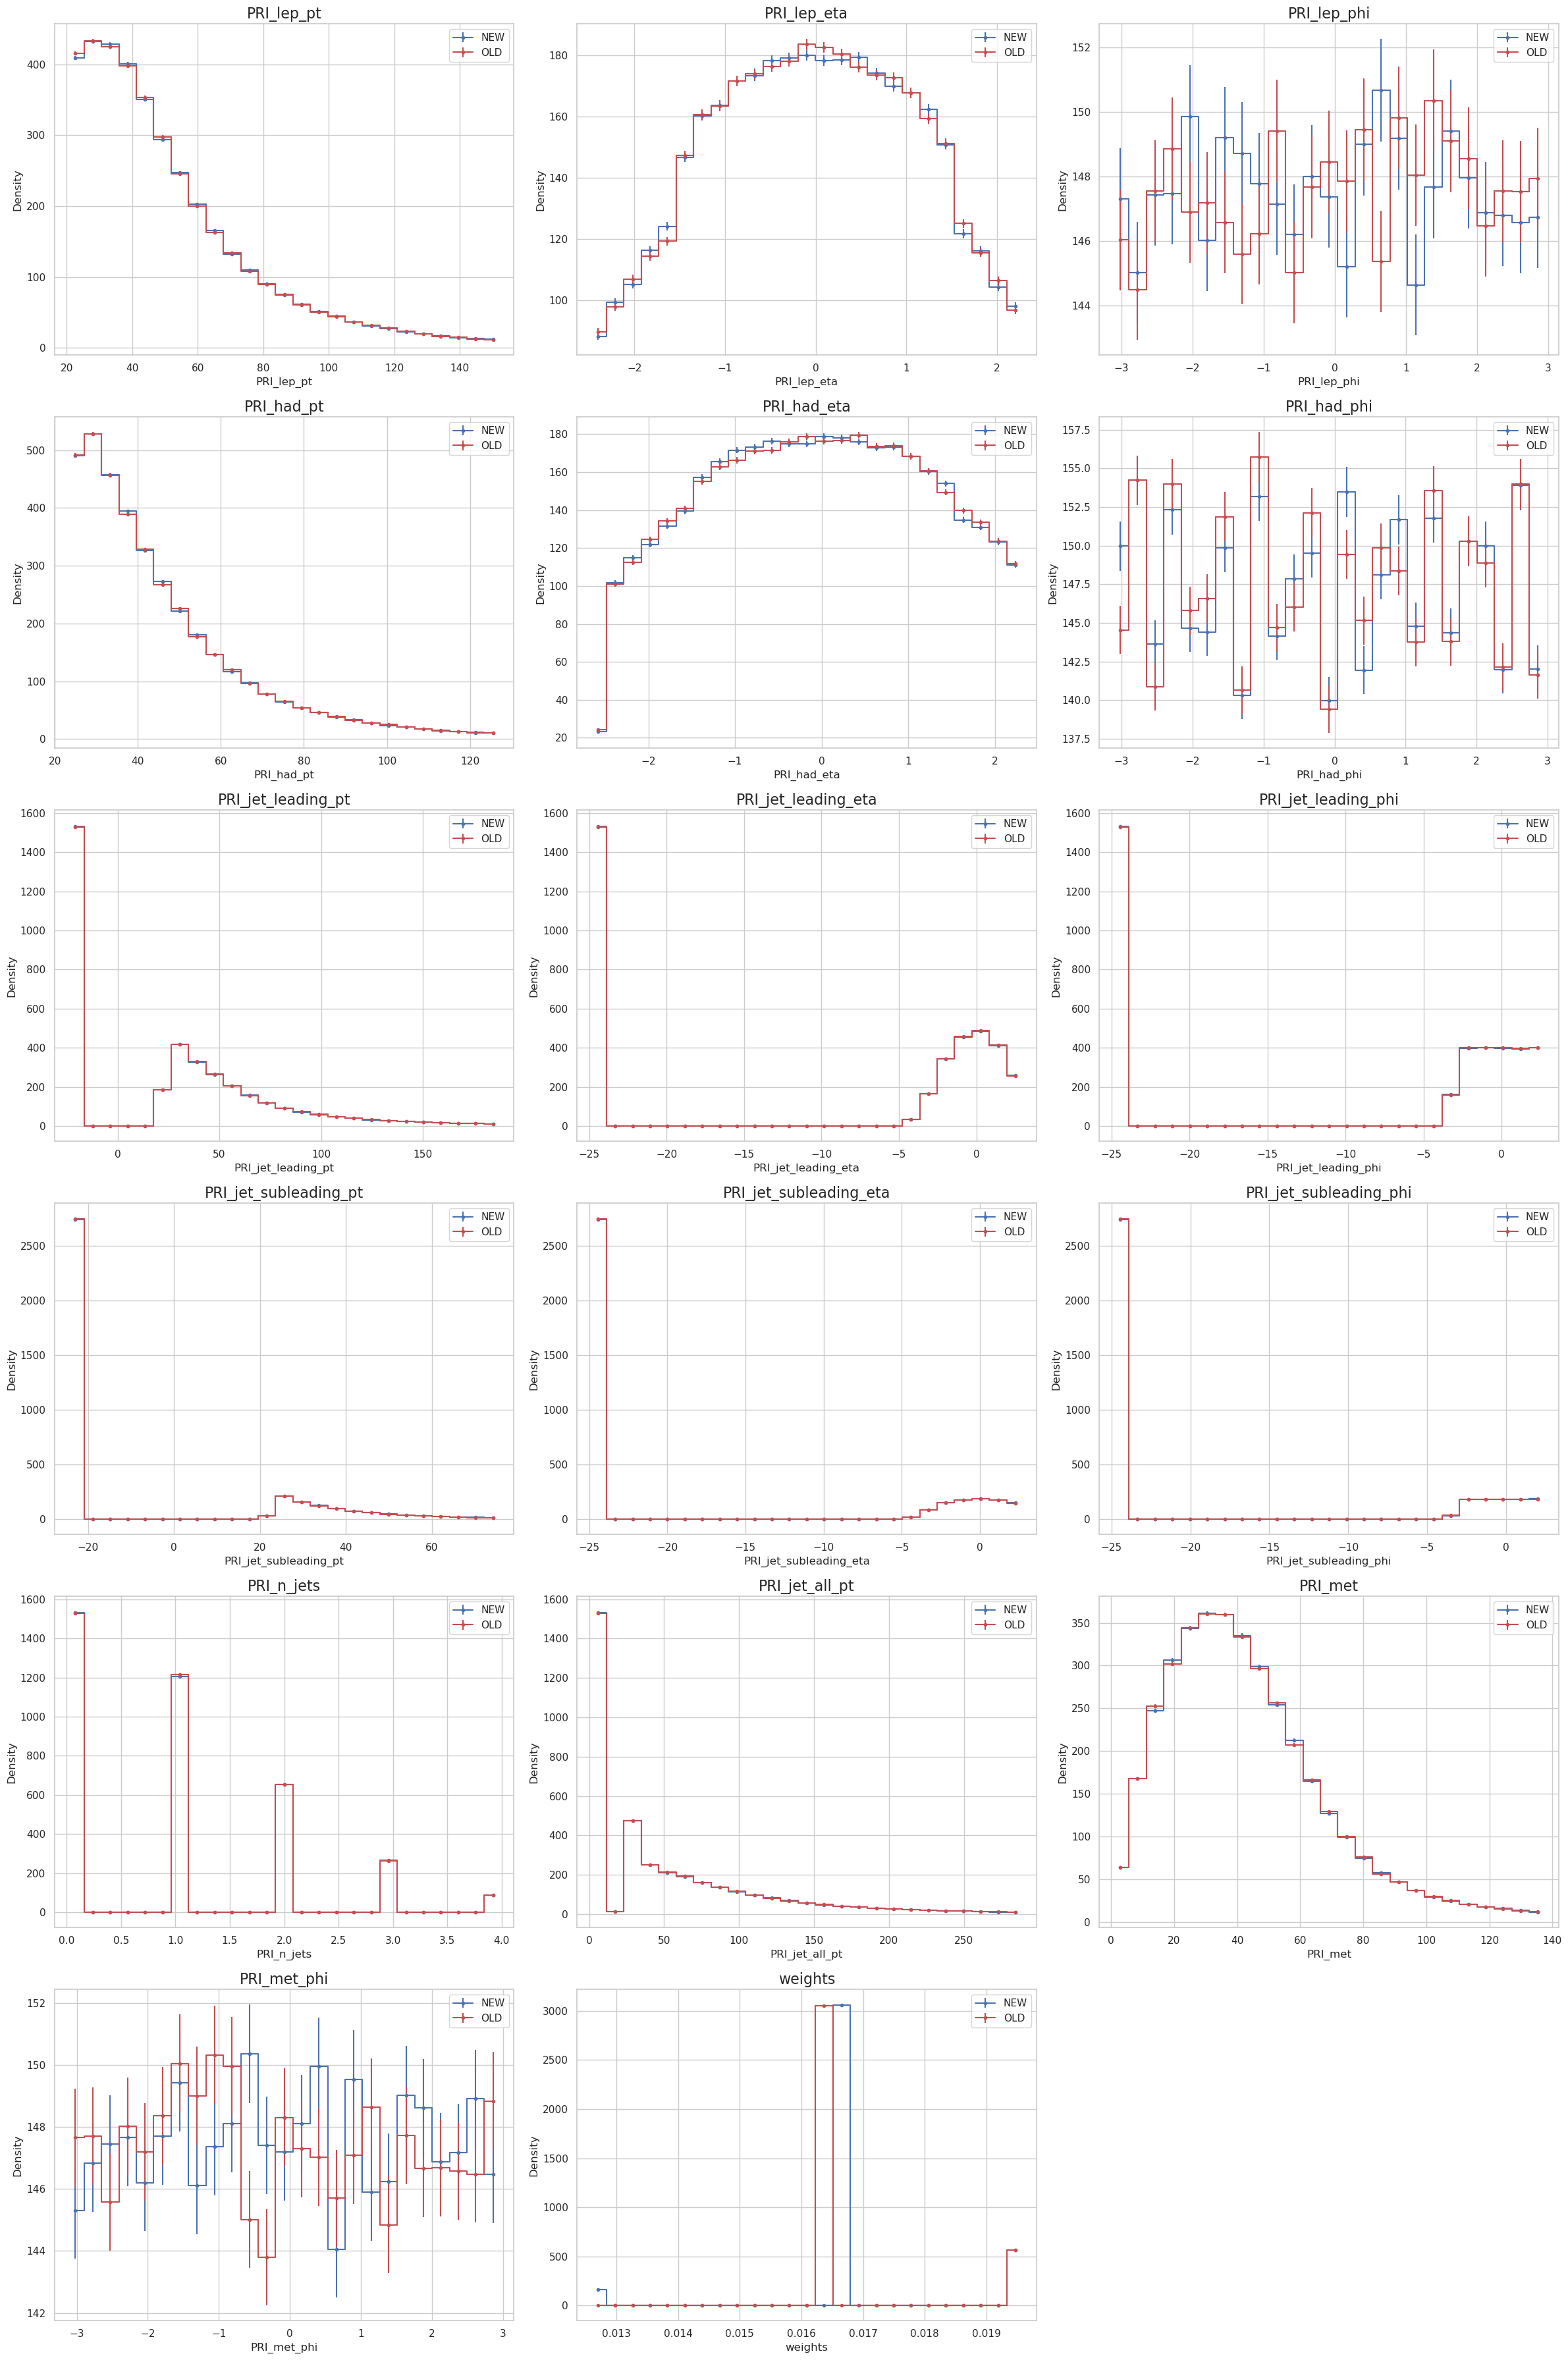

                           ttbar                             


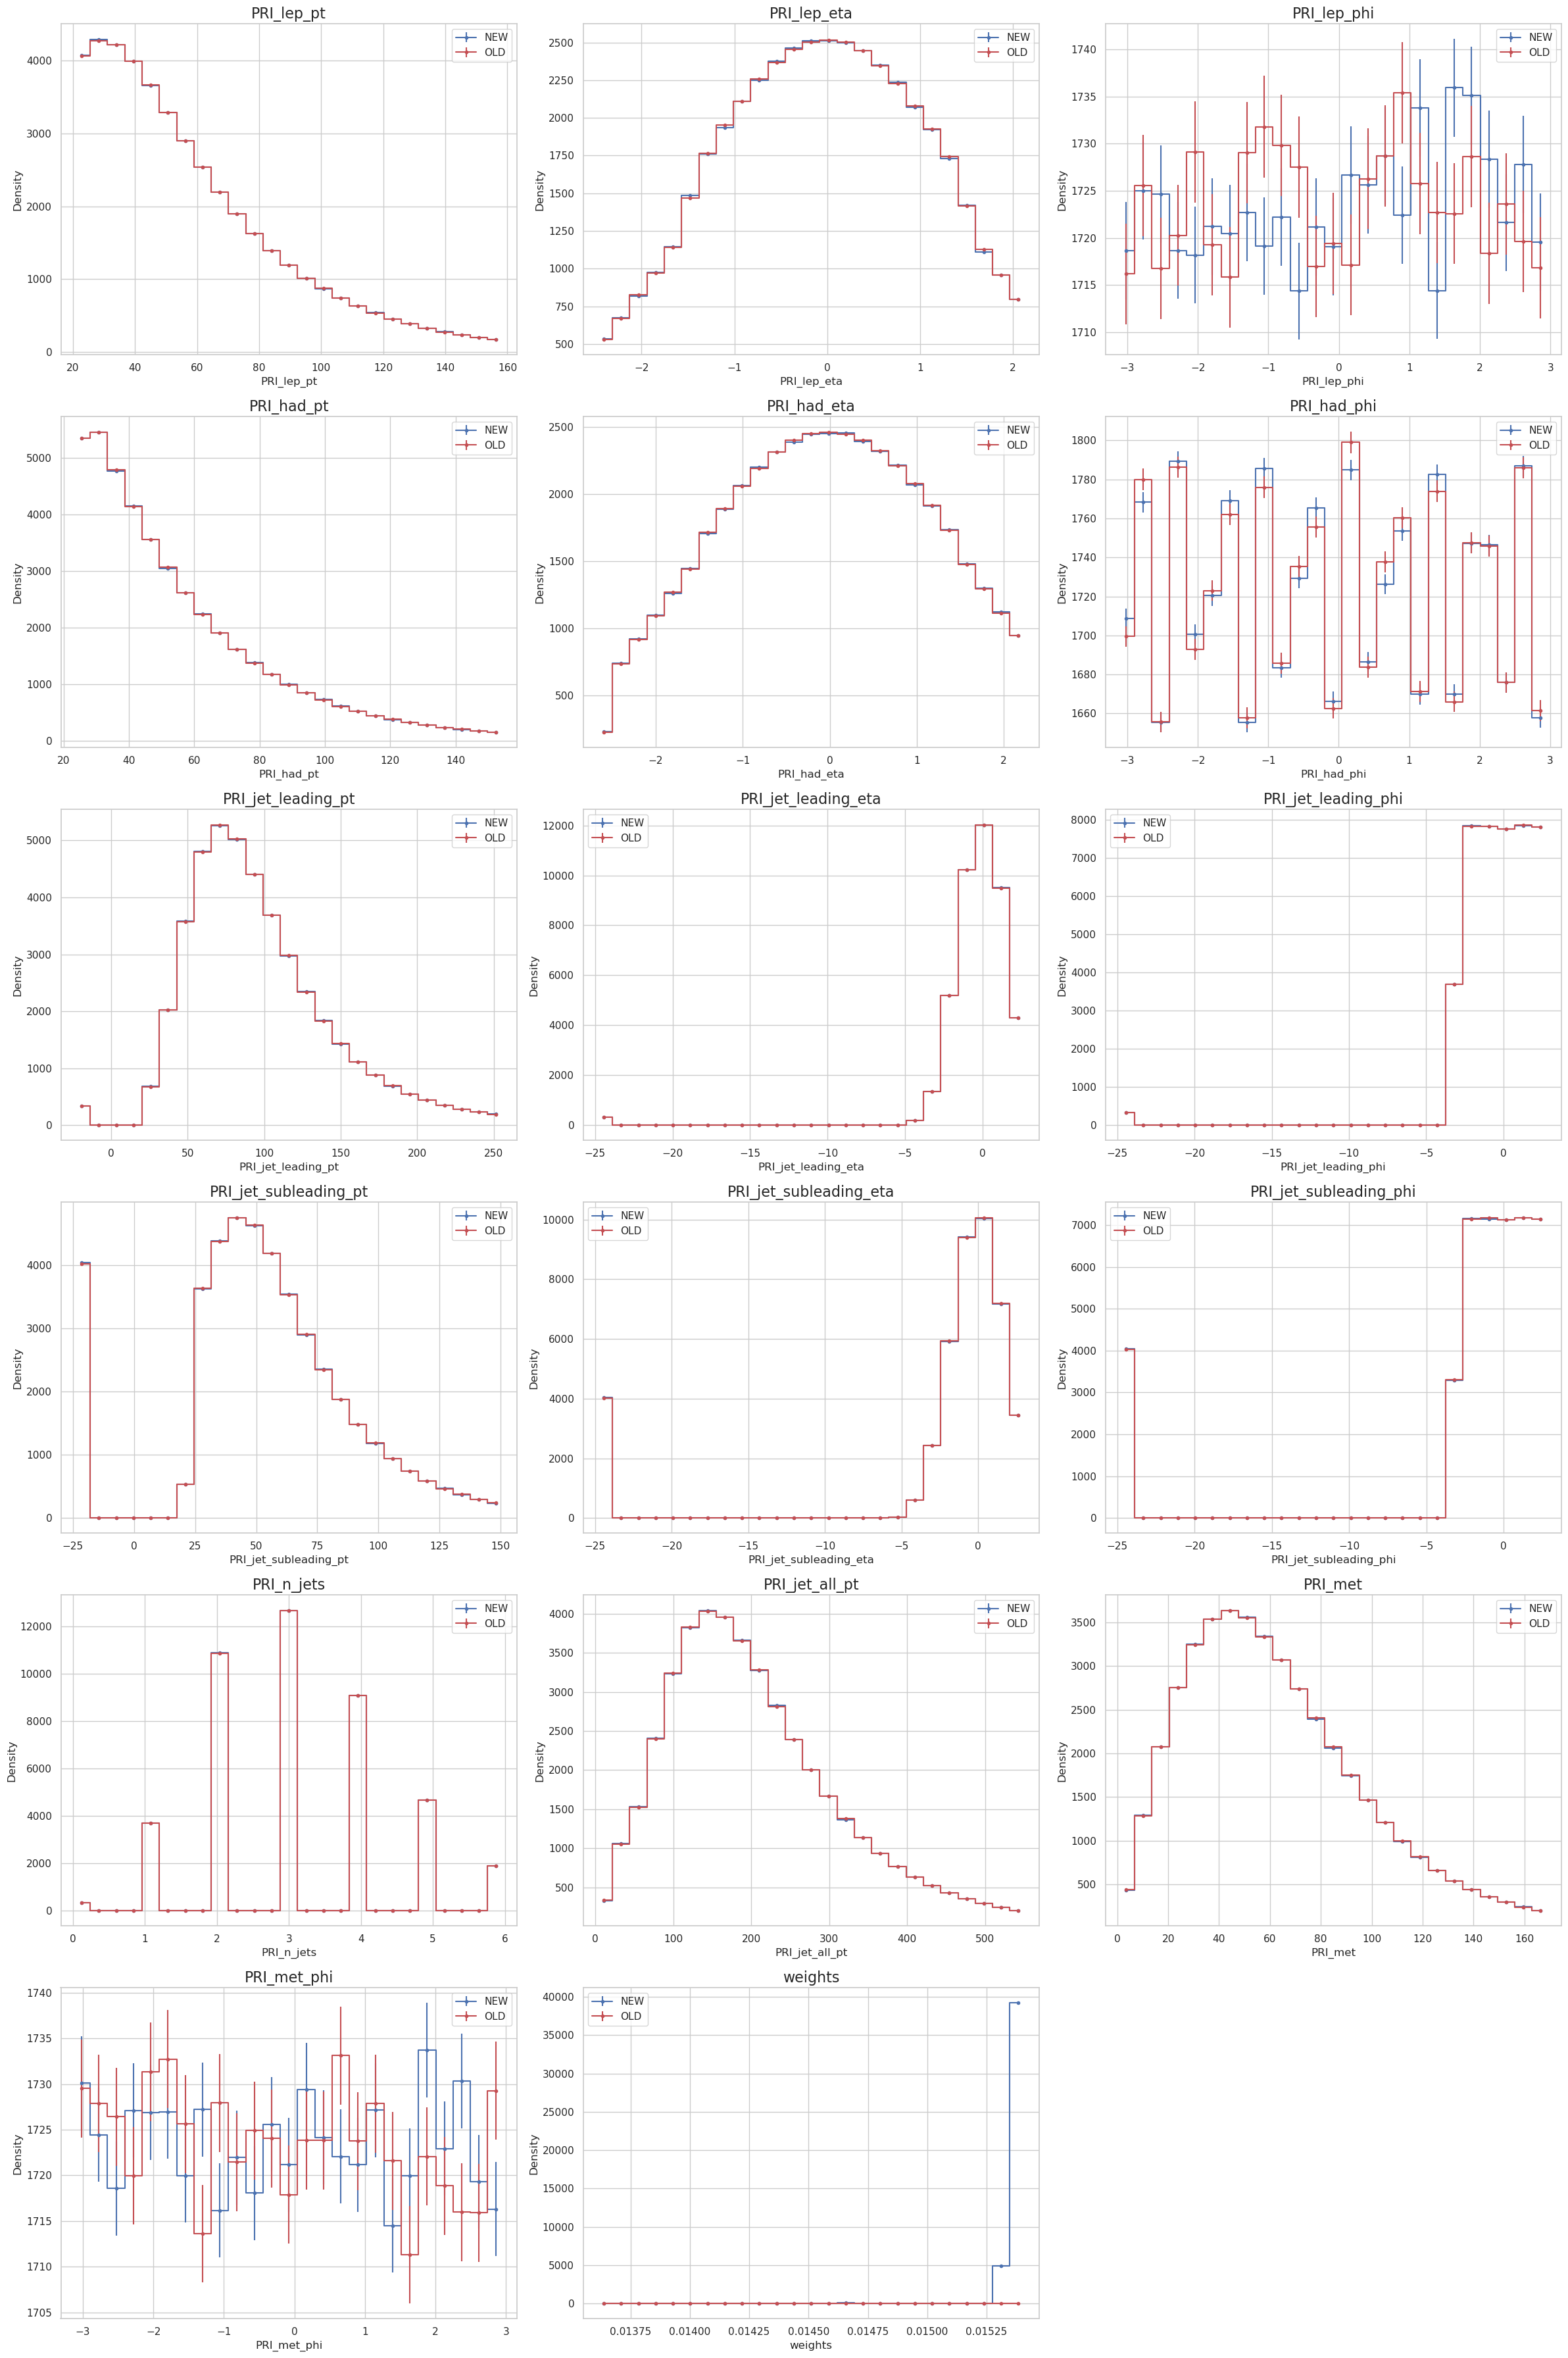

                           htautau                             


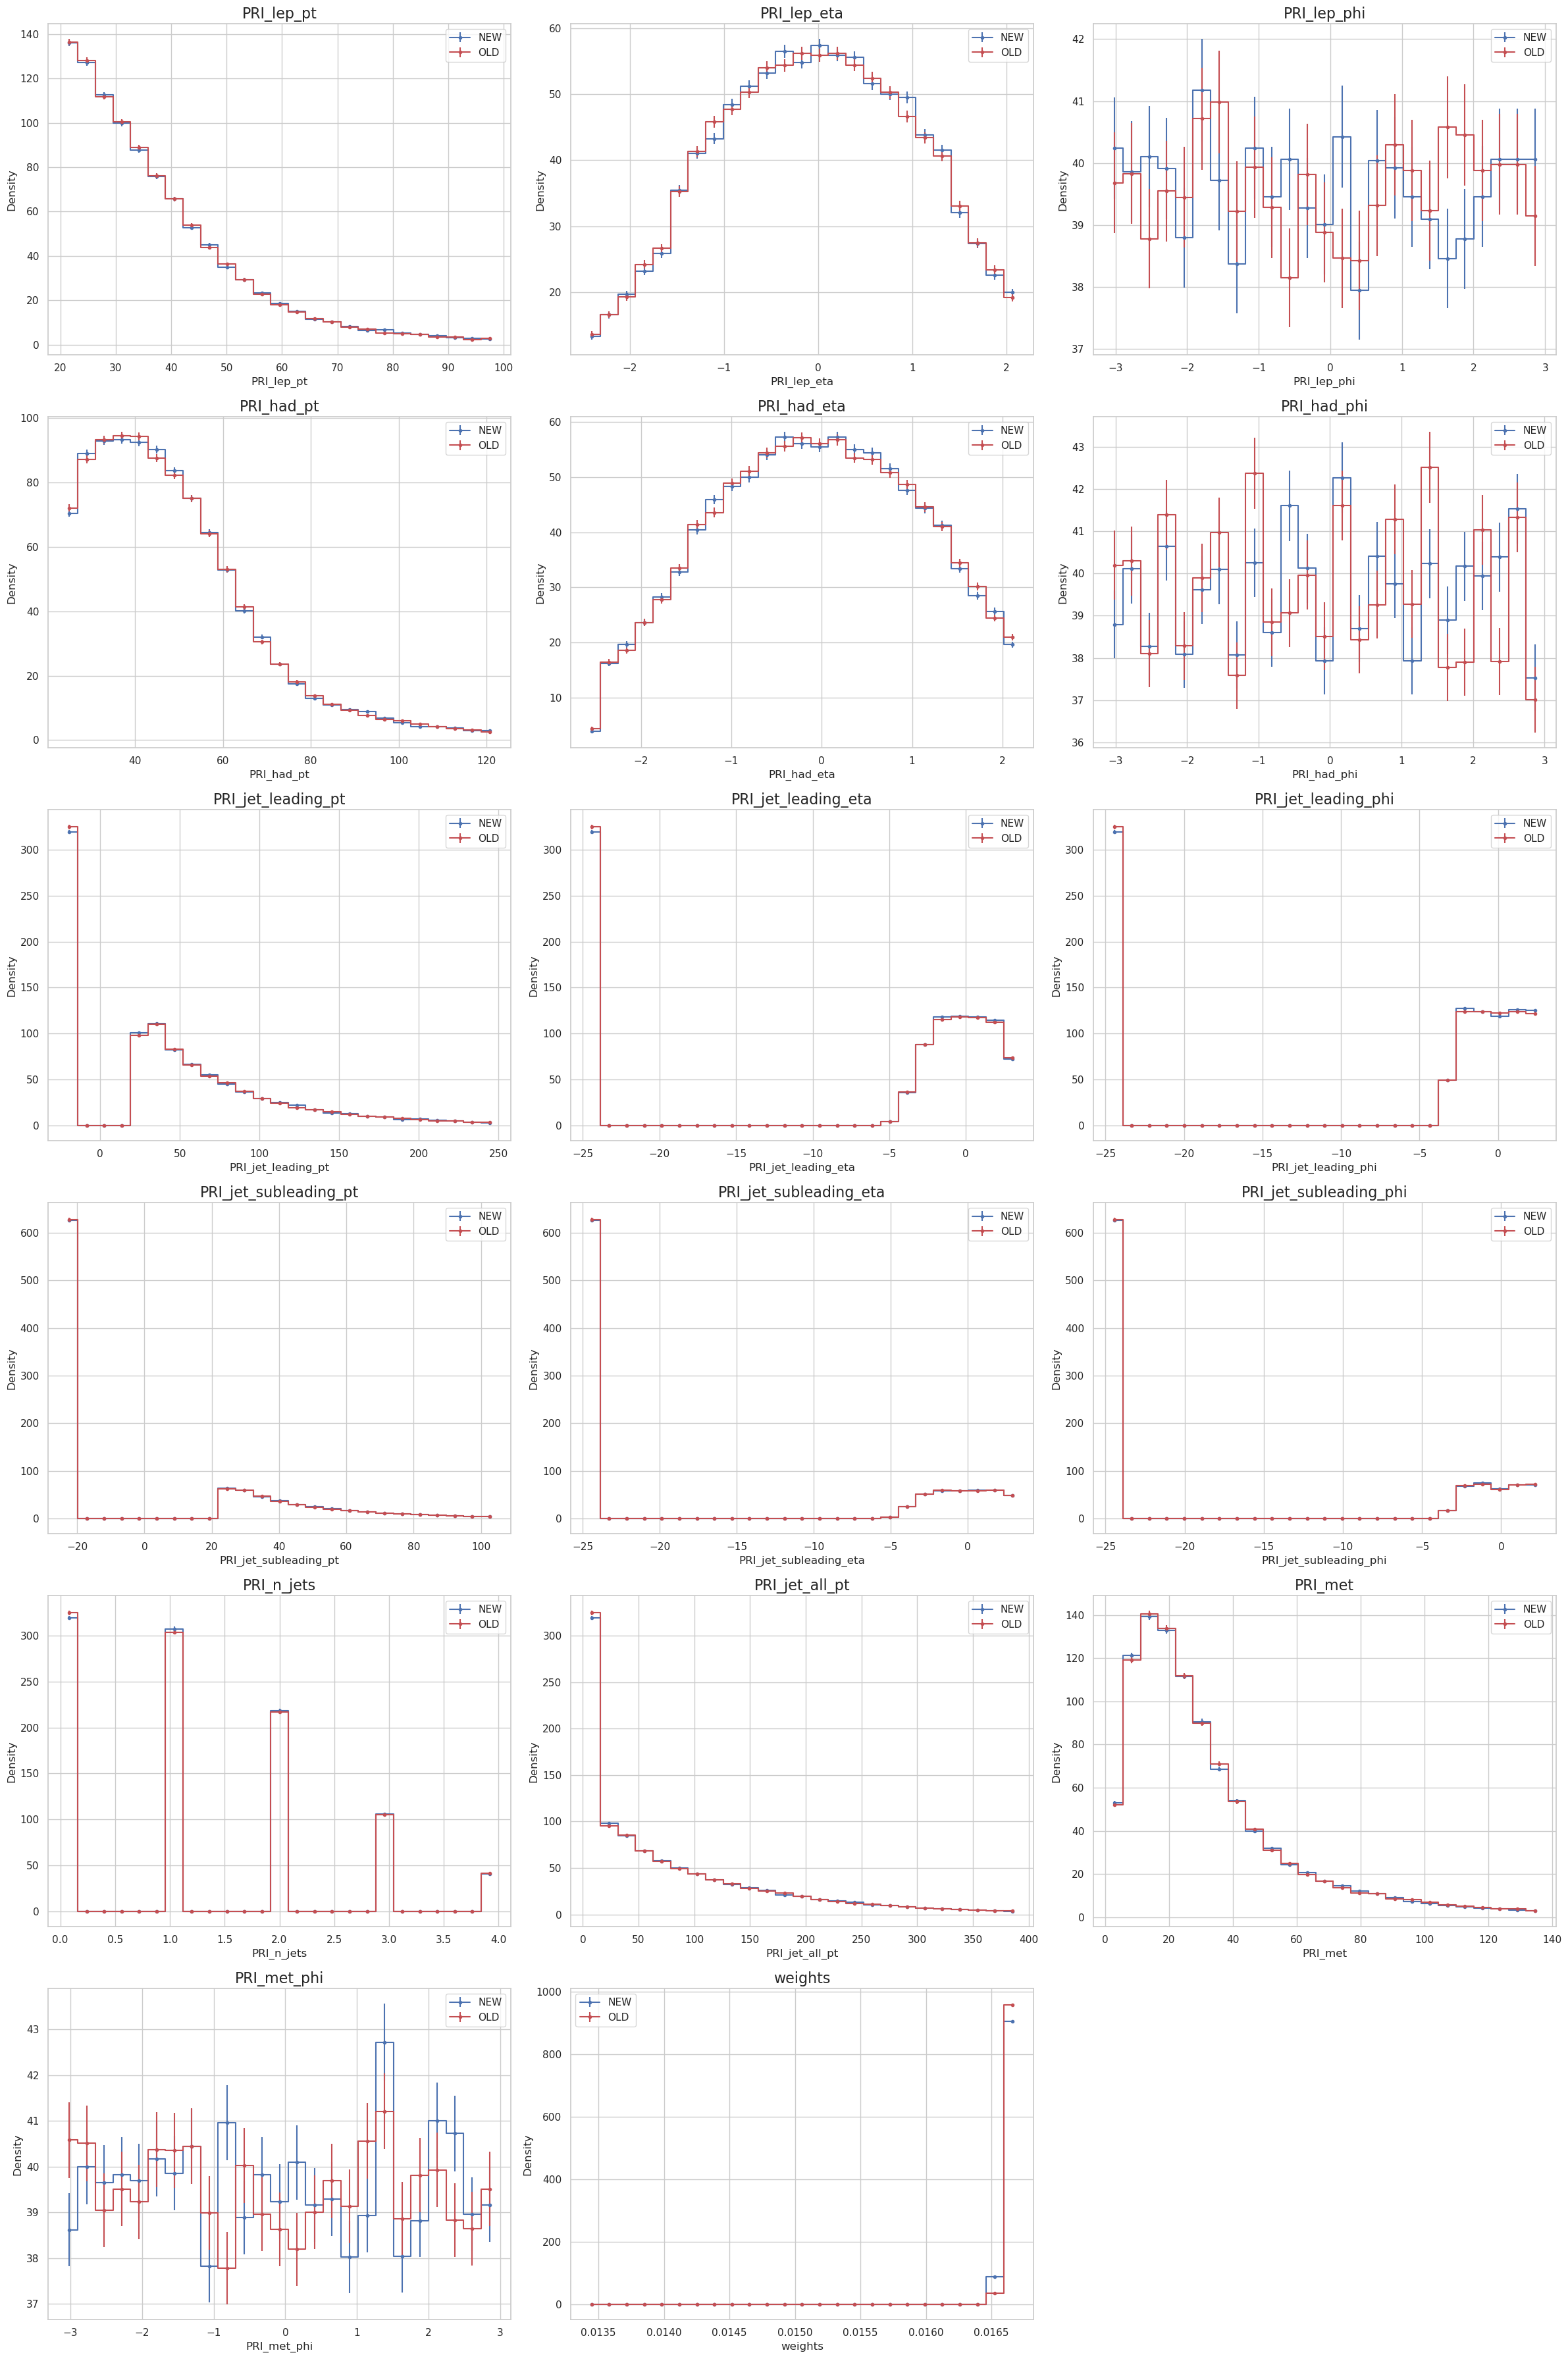

In [19]:
histogram_compare(data_set_new_re,data_old.get_test_set(),nbin=25)

                           ztautau                             
                           diboson                             
                           ttbar                             
                           htautau                             


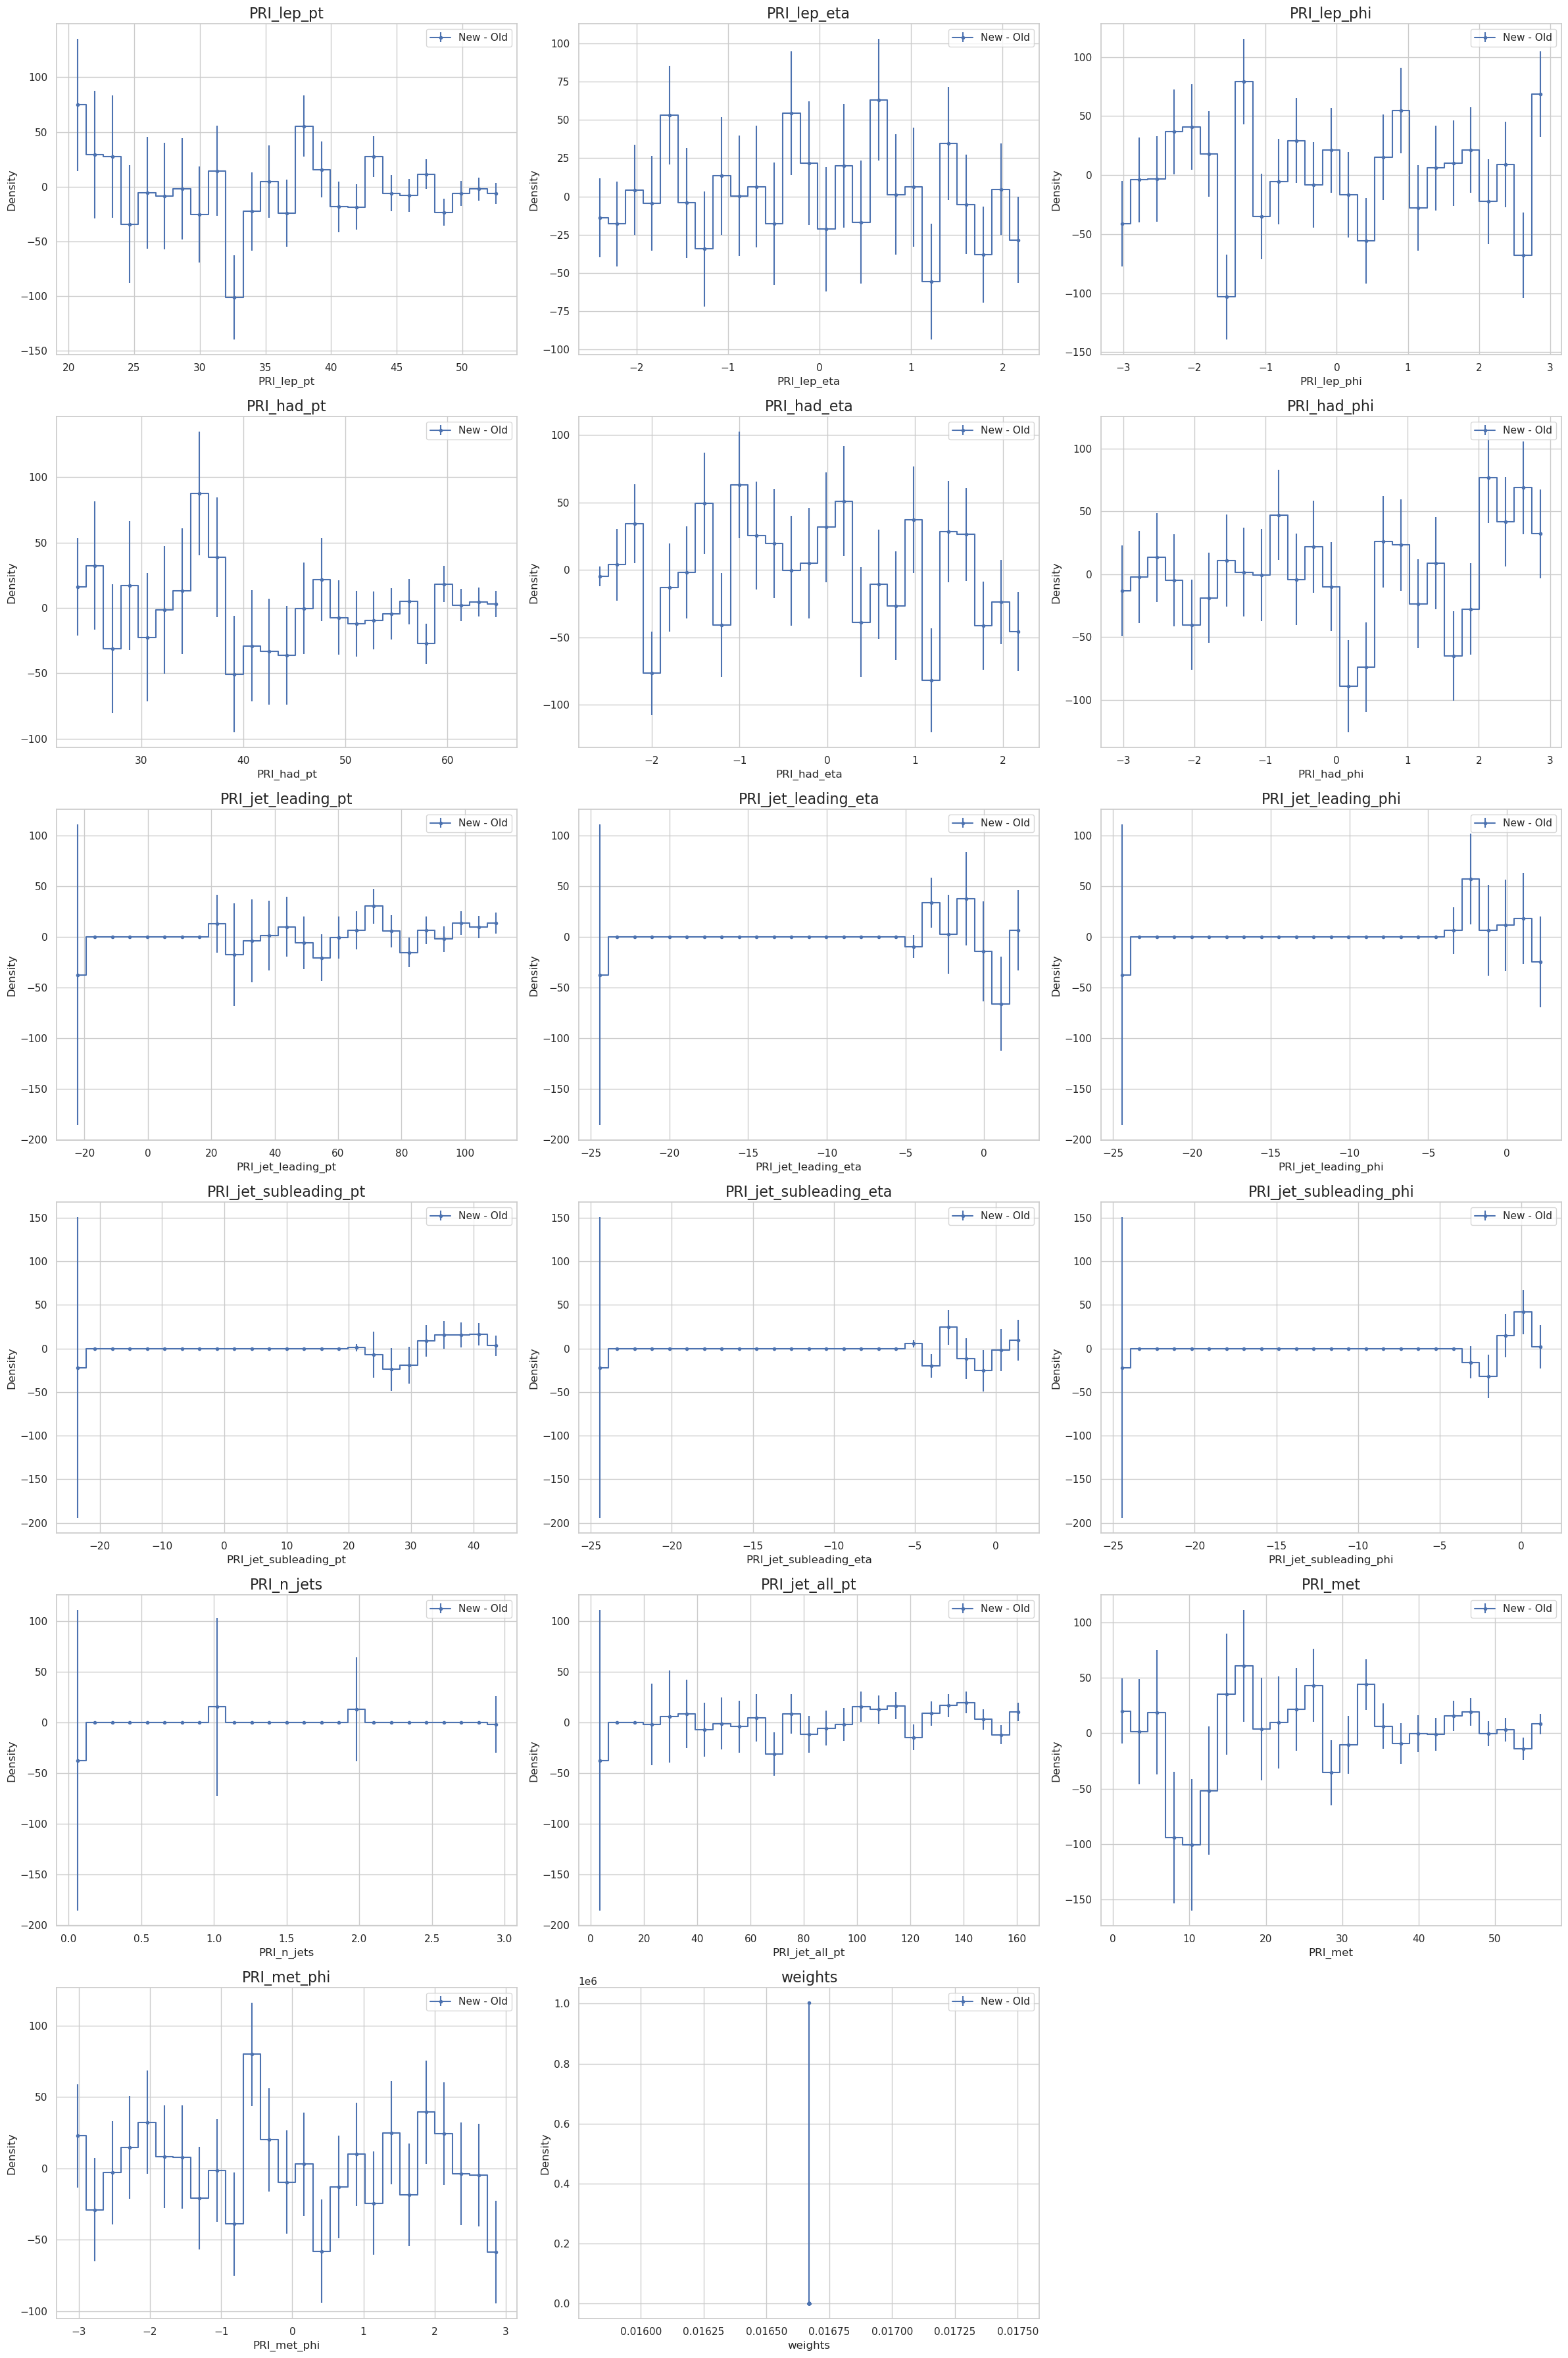

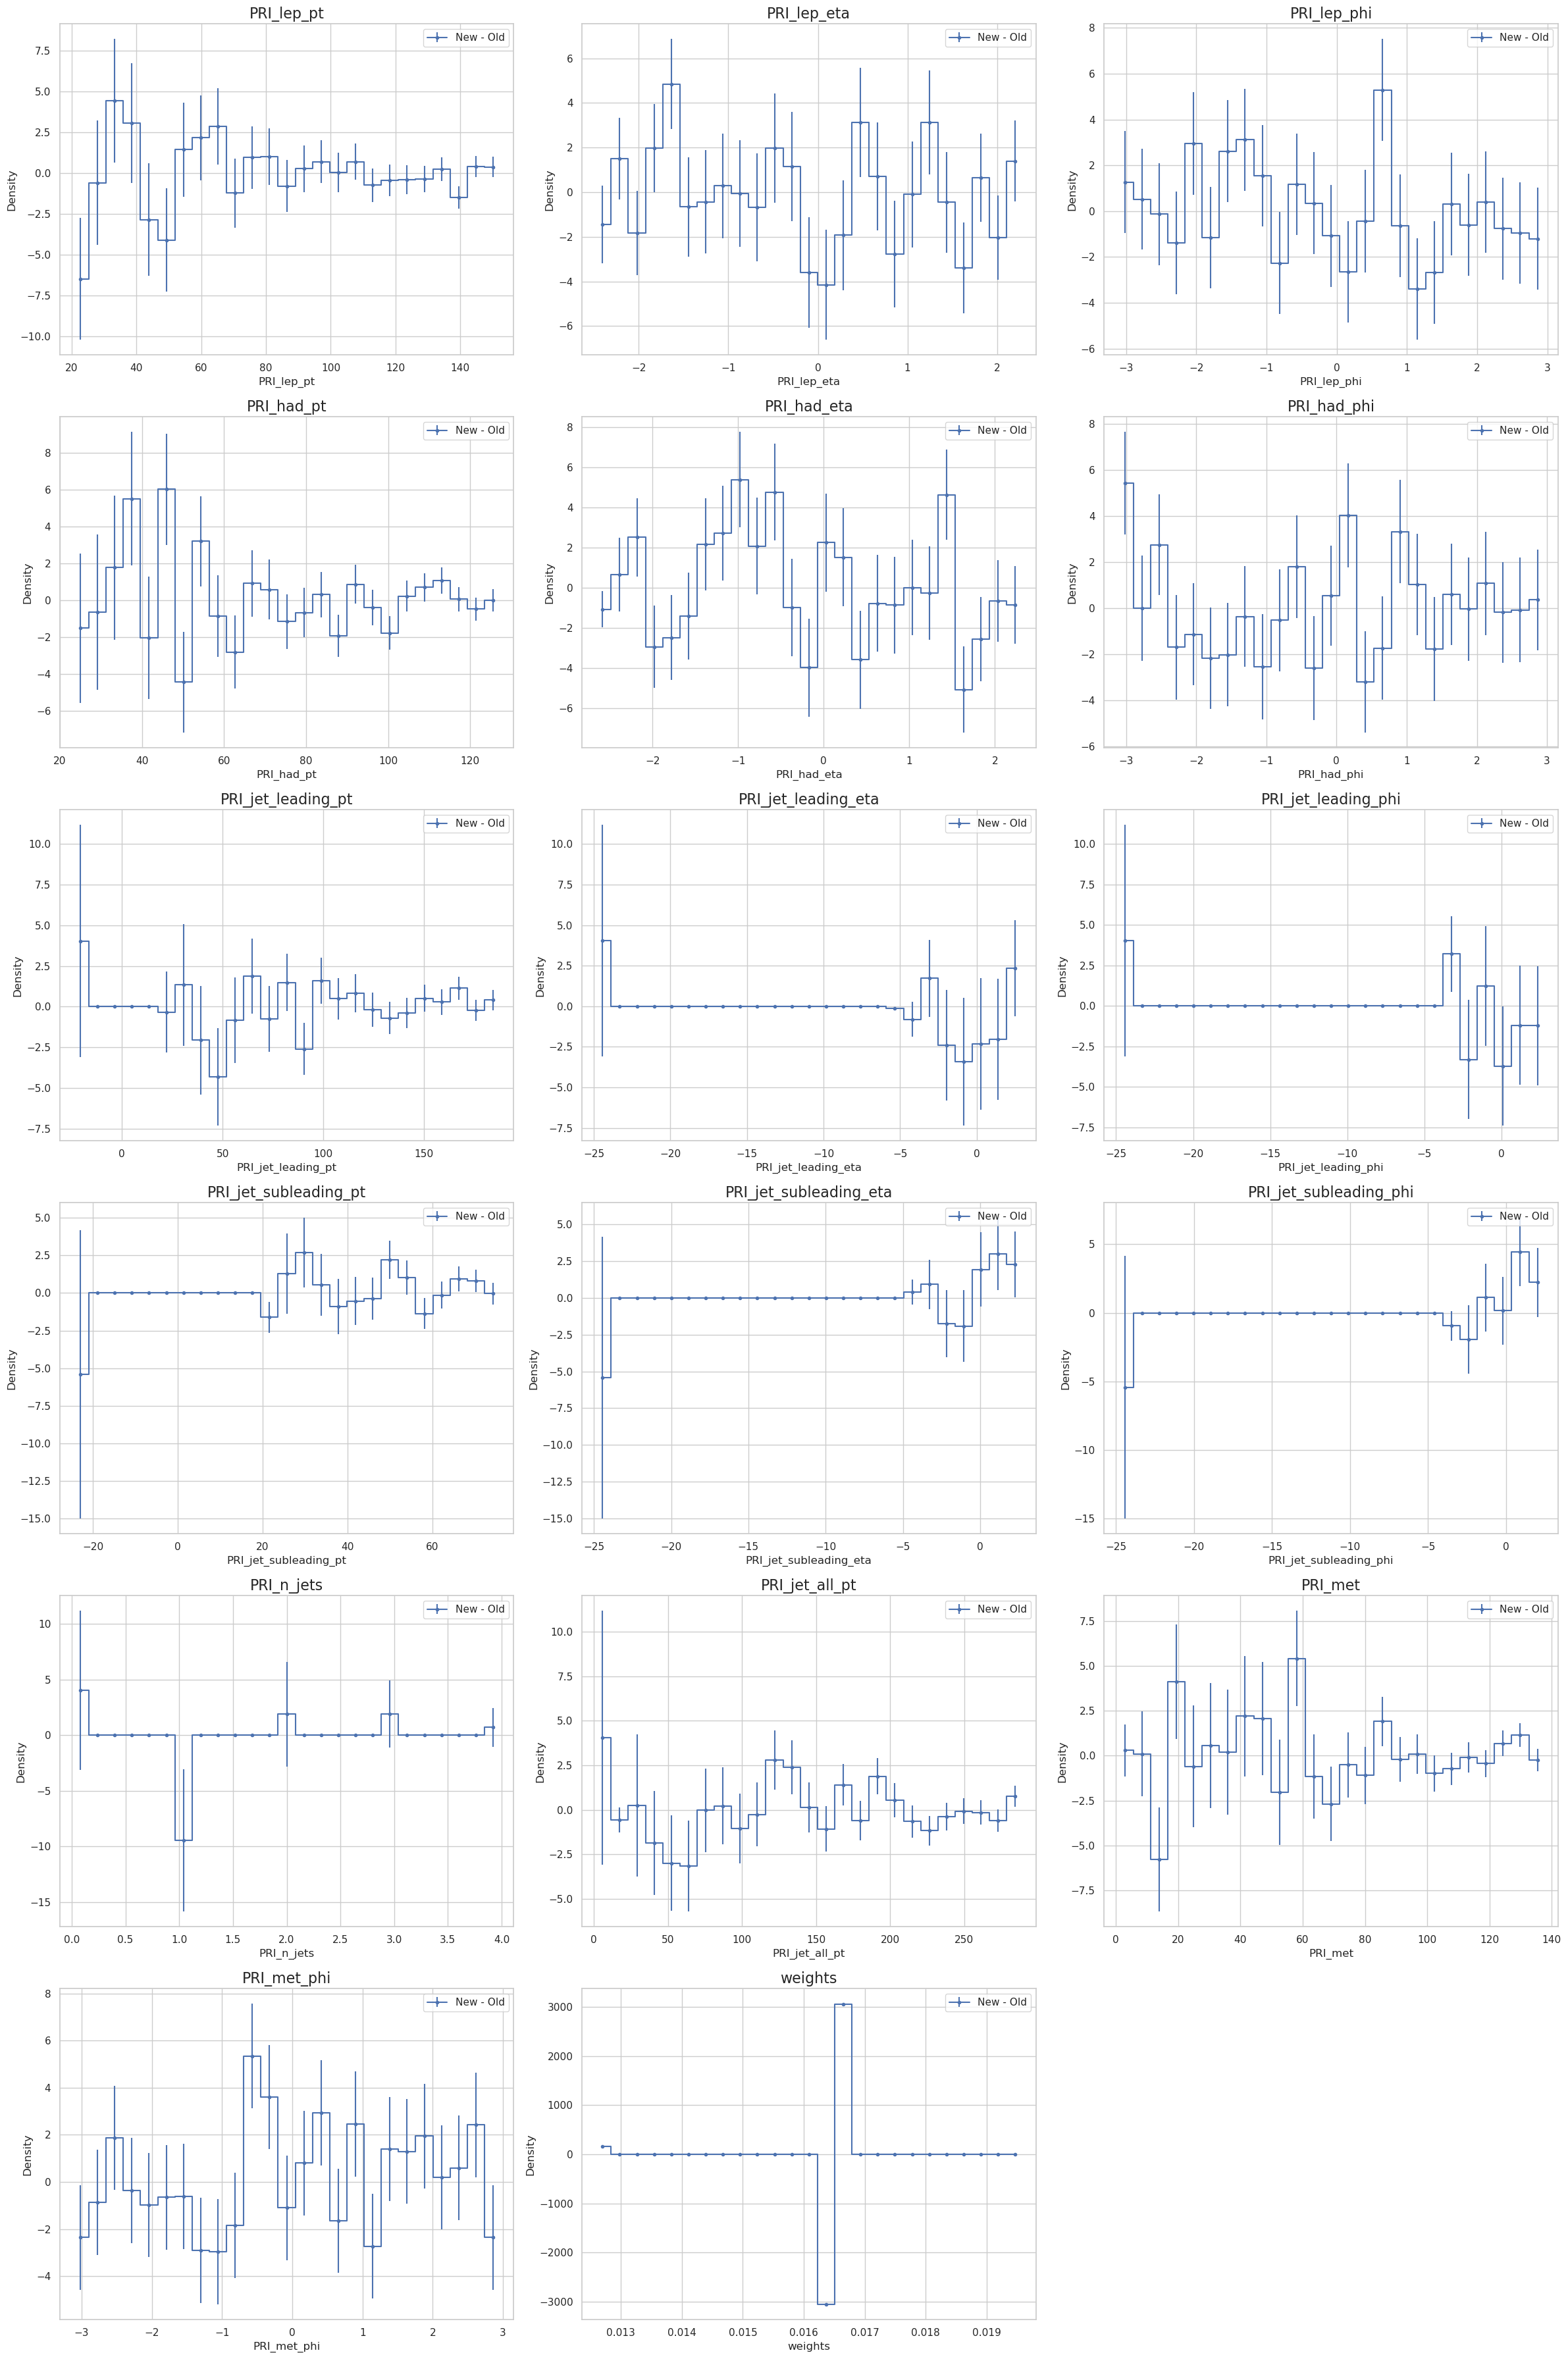

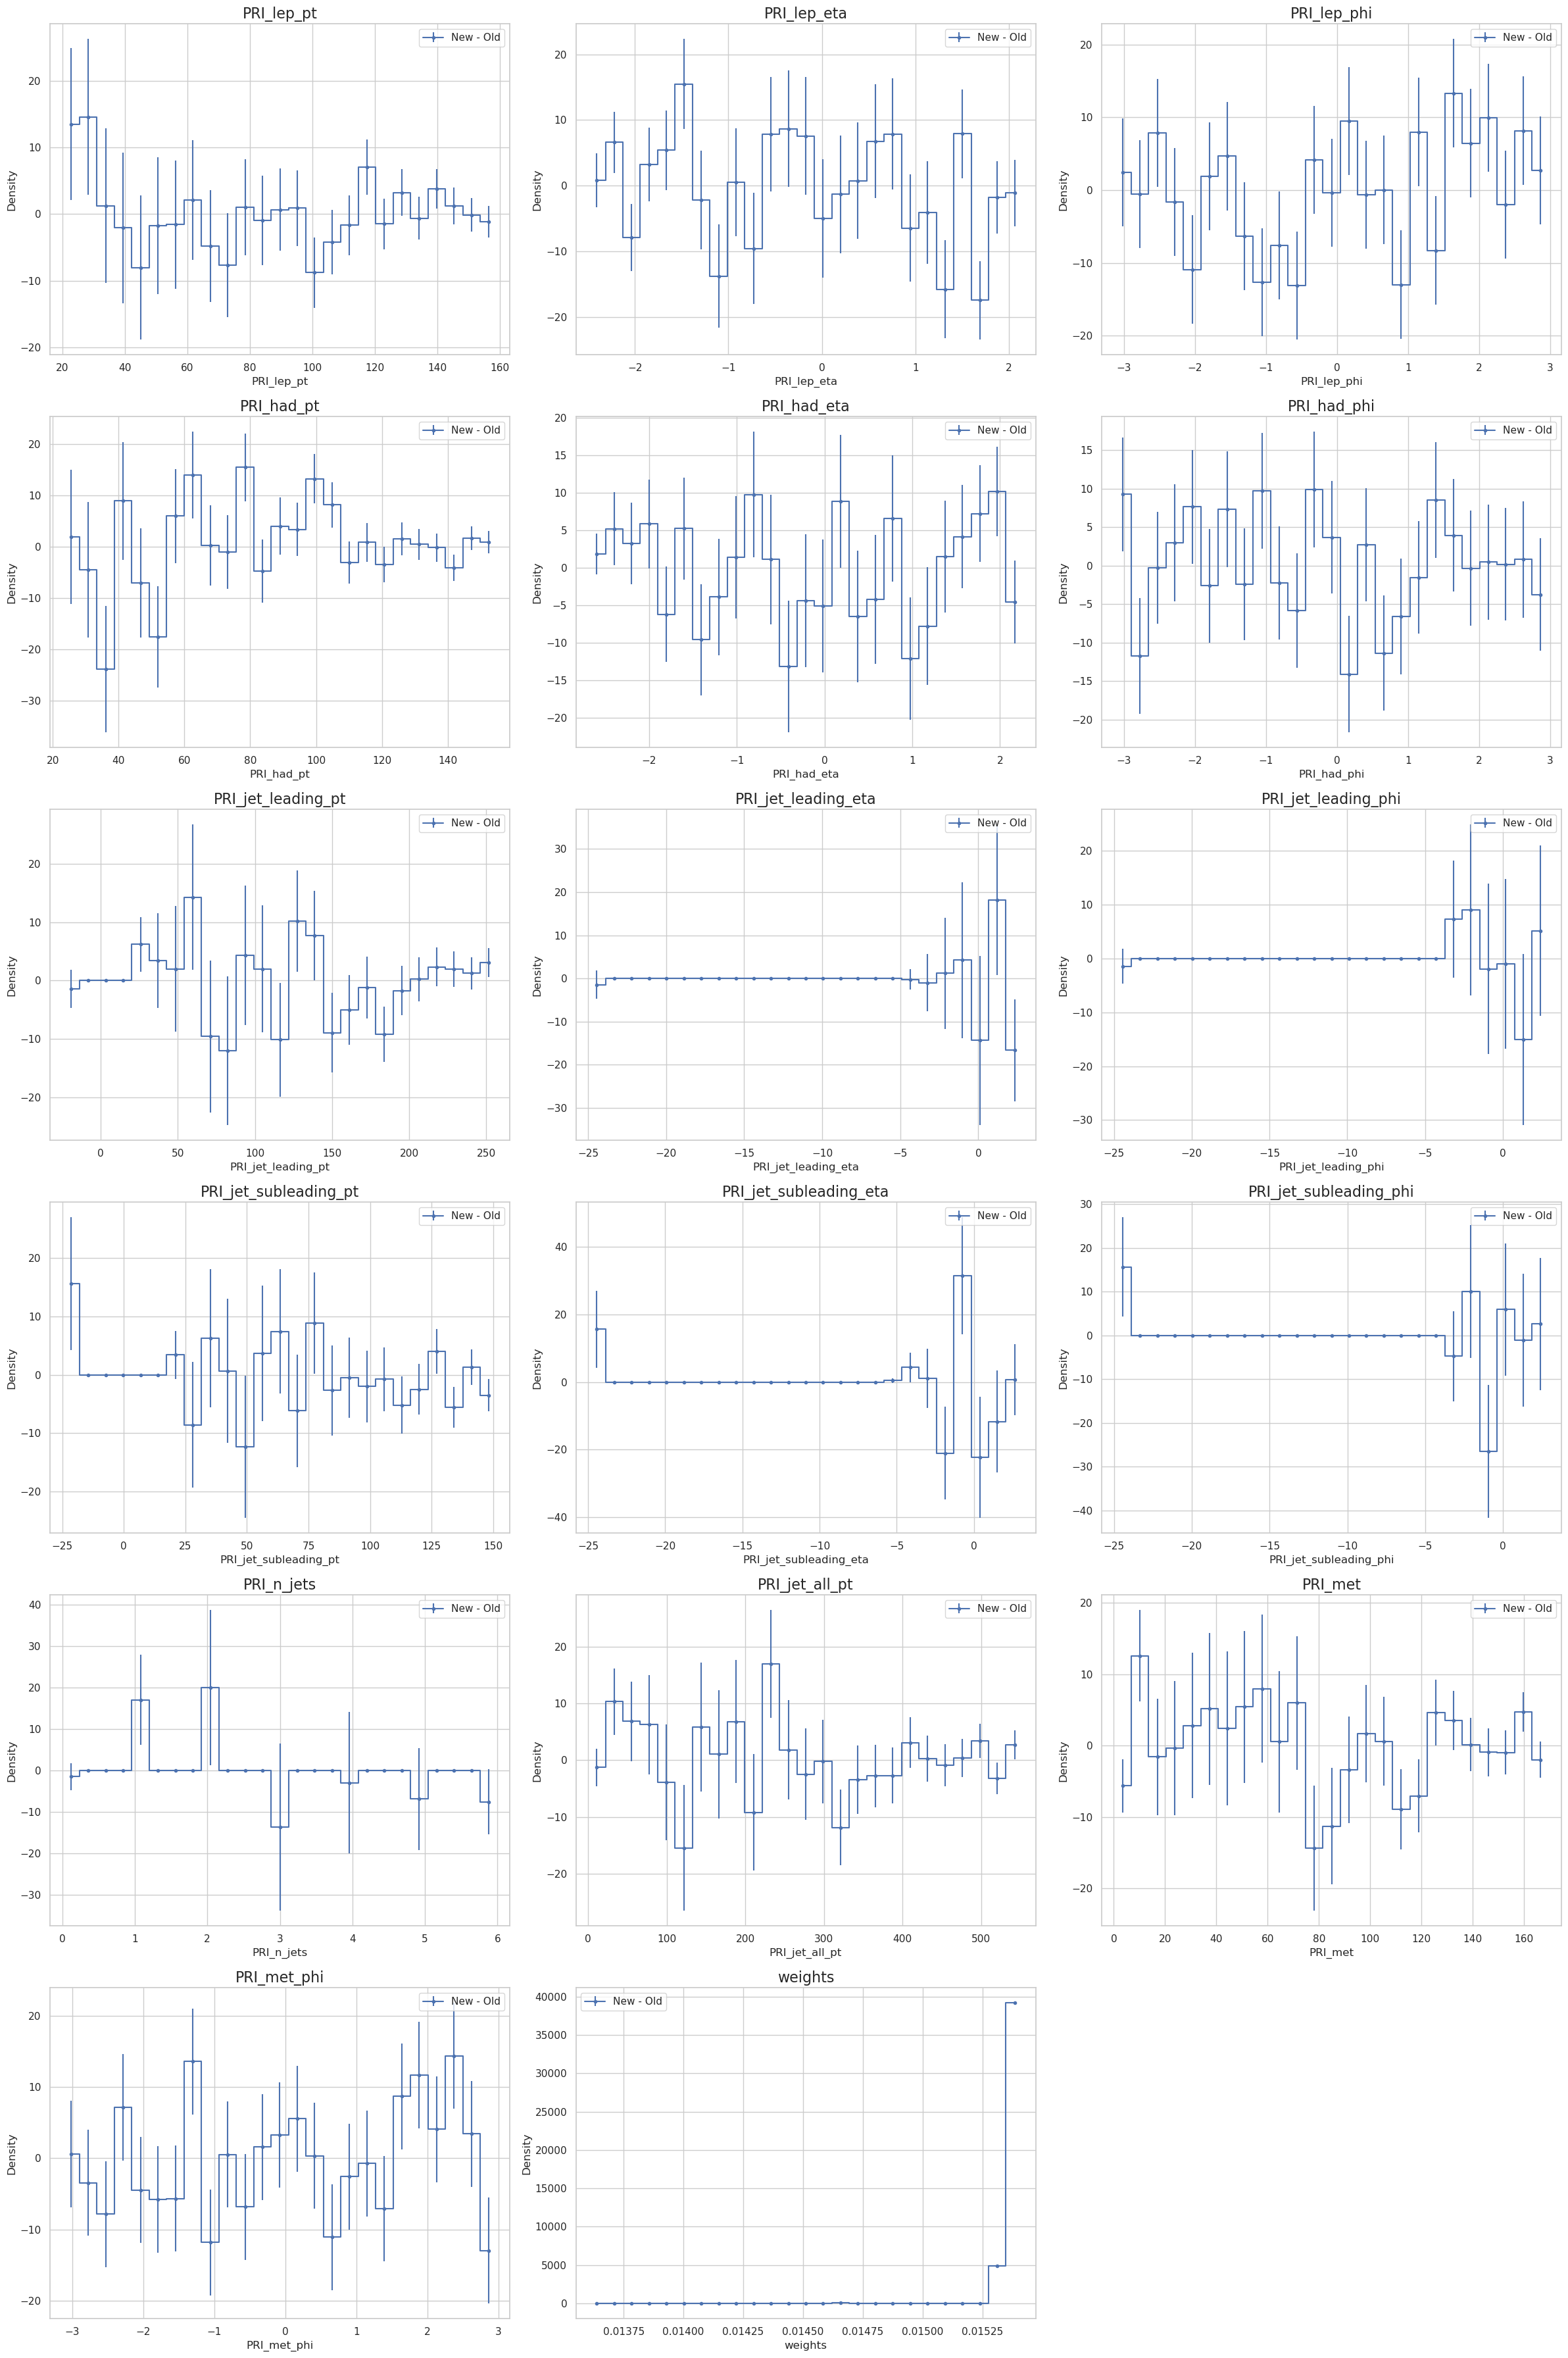

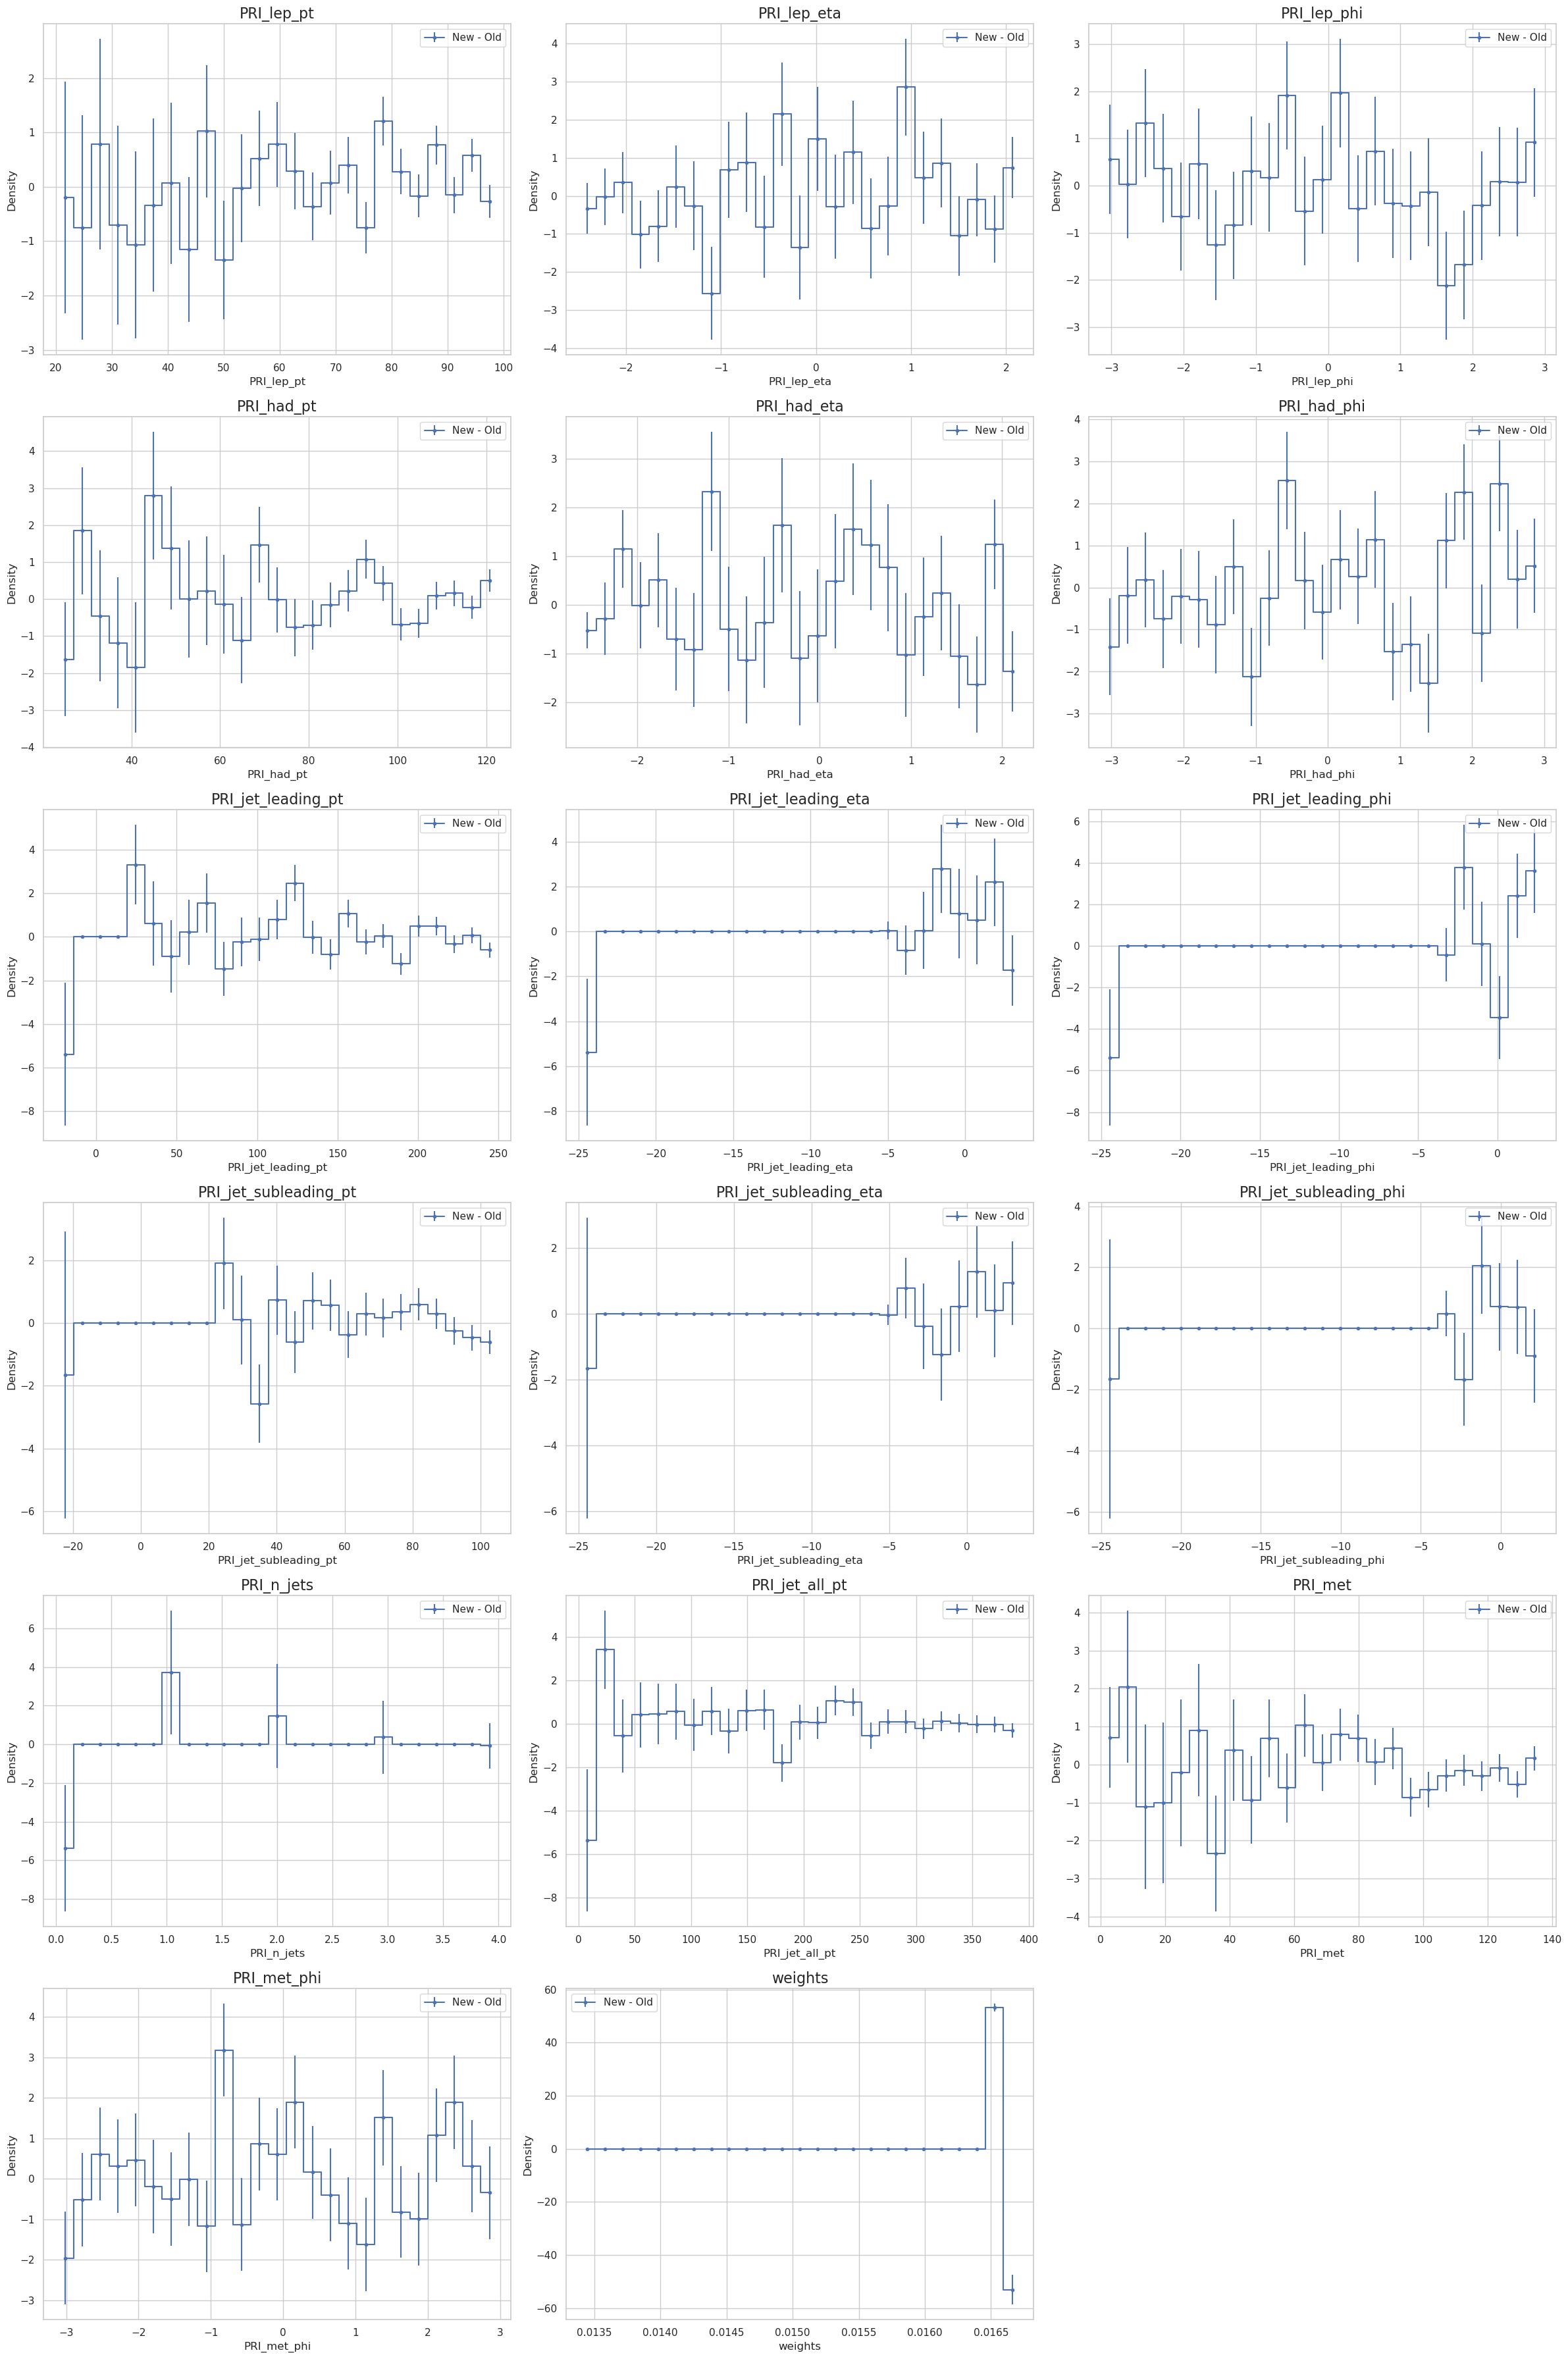

In [20]:
histogram_diff(data_set_new_re,data_old.get_test_set(),nbin=25)

In [21]:
def save_test_data(data_set, file_write_loc, output_format="csv"):
    # Create directories to store the label and weight files
    reference_settings_path = os.path.join(file_write_loc, "reference_data", "settings")
    if not os.path.exists(reference_settings_path):
        os.makedirs(reference_settings_path)

    test_data_loc = os.path.join(file_write_loc,"input_data", "test", "data")
    if not os.path.exists(test_data_loc):
        os.makedirs(test_data_loc)

    test_settings_path = os.path.join(file_write_loc,"input_data", "test", "settings")
    if not os.path.exists(test_settings_path):
        os.makedirs(test_settings_path)

    for key in data_set.keys():
        
        if output_format == "csv" :
            if not os.path.exists(test_data_loc):
                os.makedirs(test_data_loc)
            test_data_path = os.path.join(test_data_loc, f"{key}_data.csv")

            data_set[key].to_csv(test_data_path, index=False)

        if output_format == "parquet" :
            if not os.path.exists(test_data_loc):
                os.makedirs(test_data_loc)             
            test_data_path = os.path.join(test_data_loc, f"{key}_data.parquet")
           
            data_set[key].to_parquet(test_data_path, index=False)

    mu = np.random.uniform(0, 3, 10)
    mu = np.round(mu, 3)
    mu_list = mu.tolist()
    print(f"[*] --- mu in test set : ", mu_list)

    test_settings = {"ground_truth_mus": mu_list}
    Settings_file_path = os.path.join(reference_settings_path, "data.json")
    with open(Settings_file_path, "w") as json_file:
        json.dump(test_settings, json_file, indent=4)

    Settings_file_path = os.path.join(test_settings_path, "data.json")
    with open(Settings_file_path, "w") as json_file:
        json.dump(test_settings, json_file, indent=4)


In [ ]:
# output_file_loc = "/global/cfs/cdirs/m4287/hep/DATA_PHASE_2/Full_data_files_20250305/"
# output_format = "parquet"
# save_test_data(data_set_new_re, os.path.join(output_file_loc, "challenge_data_reweighted"), output_format)

In [ ]:
print("done")